# Foundations of Statistical analysis  Machine Leaning - Part 2
## Dr Christine Malot

# Day 1

## Example 1.1 - Importance of the number of observations

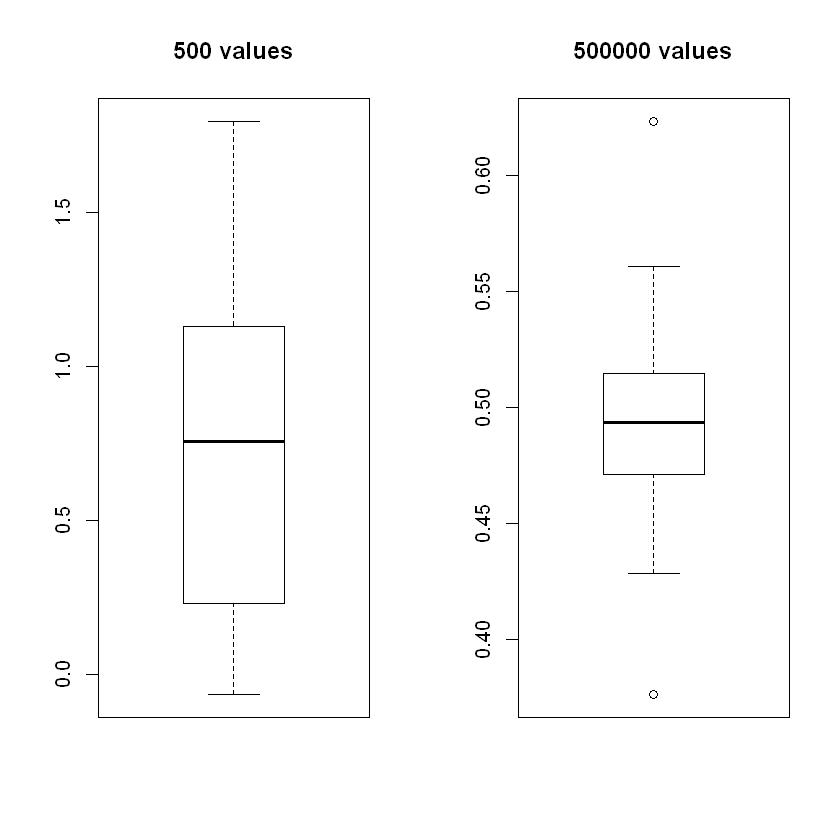

In [2]:
A <- rnorm(10,0.5,4)    #n too small to get a 0.5 as a good estimator
B <- rnorm(10000,0.5,4) #n is ok

Am<-matrix(rnorm(500,0.5,4),ncol=50)
Bm<-matrix(rnorm(500000,0.5,4),ncol=10000)

meanA<-apply(Am,1,mean)  #1 = for each row
meanB<-apply(Bm,1,mean)  #1 = for each row

# see the difference on the bar plot
par(mfrow = c(1,2))
boxplot(meanA,main = "500 values")
boxplot(meanB,main = "500000 values")


## Example 1.2 - Max(Xi) is a good estimator for uniform distribution
* simulation : A uniform distribution Unif(0,5) with 500000 observations

In [3]:
Am<-matrix(runif(500000,0,5),ncol=100)
maxA<-apply(Am,1,max)
sprintf("Estimator Max(Xi) of Theta in a Unif(0,Theta=5) distribution : %f" ,mean(maxA))
sprintf("The variance of the estimator is : %f", var(maxA))

[1] "Estimator Max(Xi) of Theta in a Unif(0,Theta=5) distribution : 4.949863"

[1] "The variance of the estimator is : 0.002424"

# Day 2

## Example 2.1 - Frequency vs density histogram

### The two histograms
* before the histogram the "summary" R function gives various information on the dataset
* for instance the fact that Mean >> Median reveal that it is not a symetric distribution
* after the graphes, the variable h$density, gives the values used in the density graph

[1] "Summary of the Dataset"

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000761  0.668422  1.577319  2.312863  3.182293 14.822667 

[1] "Values of the density"

[1] 0.362 0.223 0.146 0.077 0.075 0.039 0.026 0.014 0.014 0.012 0.004 0.003
[13] 0.002 0.002 0.001

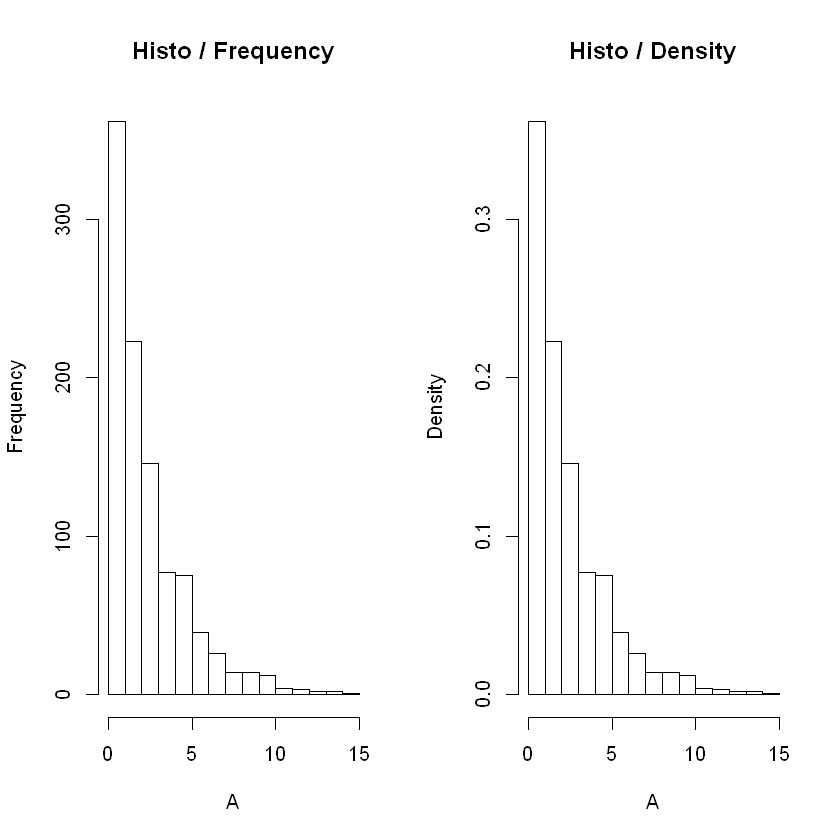

In [4]:
A=rexp(1000,0.4) # exponential distribution
sprintf("Summary of the Dataset")
summary(A) # various information on the sample
# differece between histogram frequancy / density
par(mfrow=c(1,2))
hist(A, main="Histo / Frequency") # frequency
h=hist(A,main="Histo / Density",freq=FALSE) # density
sprintf("Values of the density")
h$density # density distribution



### Case when frequency and density are not similar : non identical classes
* here the classes do not all have the same length : 1,2,1

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
"the AREAS in the plot are wrong -- rather use 'freq = FALSE'"


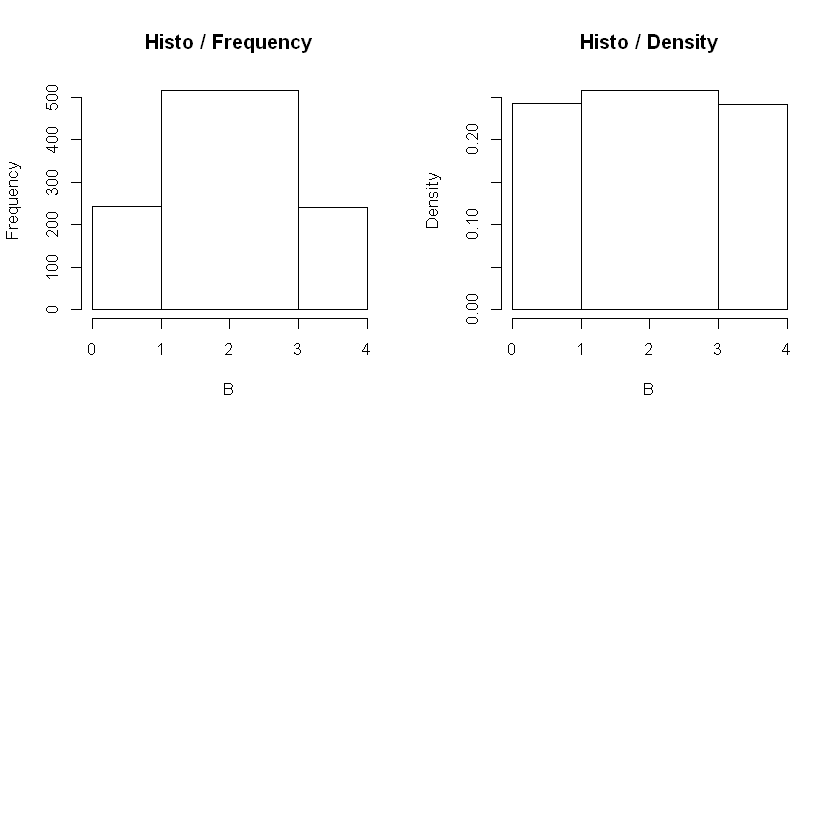

In [5]:
B=runif(1000,0,4)
par(mfrow=c(2,2))
hd=hist(B,breaks=c(0,1,3,4),freq = TRUE,main="Histo / Frequency")
hf=hist(B,breaks=c(0,1,3,4), freq = FALSE,main="Histo / Density")

## Example 2.2 - impact of size of classes on lambda calculation for exponential distribution
* Four graphes with increasing values of the size of the classes : 5, 20, 50, 100


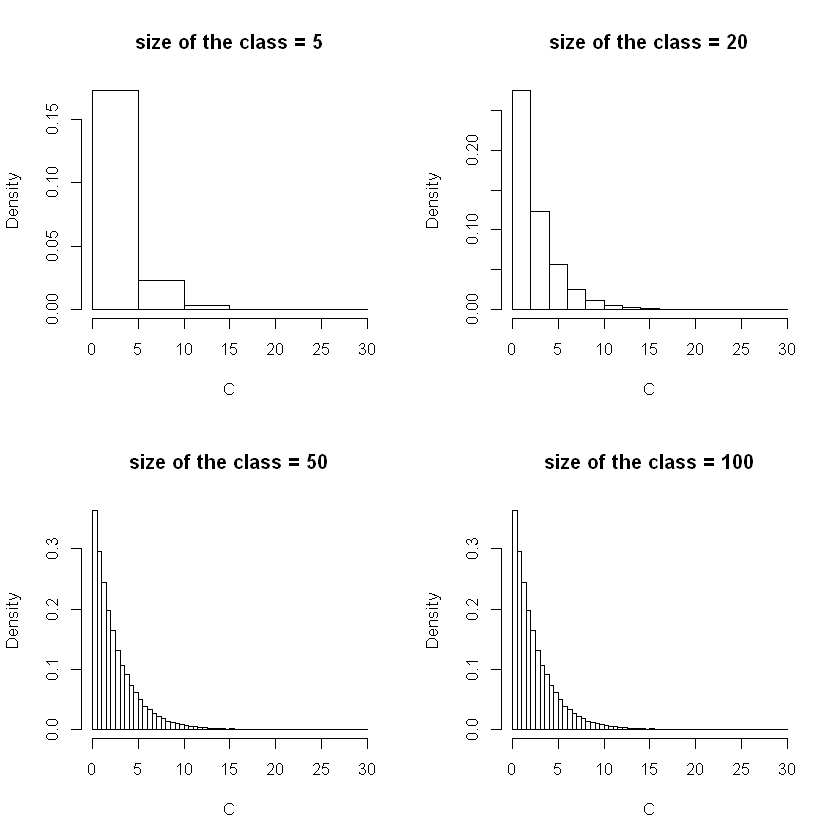

In [6]:
C=rexp(100000,0.4)
par(mfrow=c(2,2))
hist(C,breaks=5,freq=FALSE,main="size of the class = 5")
hist(C,breaks=20,freq=FALSE,main="size of the class = 20")
hist(C,breaks=50,freq=FALSE,main="size of the class = 50")
hist(C,breaks=100,freq=FALSE,main="size of the class = 100")

## Exemple 2.3 - find the lambda parameter of an exponential distribution

The simulation used is an exponential distribution with lambda = 4

### First solution : use the first value of the density vector : not a good approximation

In [7]:
A=rexp(1000,0.4)
hh=hist(A,breaks=100,plot=FALSE)
lambda_1 = hh$density[1] # density distribution - the first element of hh$density is an approximation of the estimator but ....
sprintf("First value of density vector : lambda = %f", lambda_1)


[1] "First value of density vector : lambda = 0.420000"

### Better solution : lambda_2 = 1 / mean(dataset) <- moment methods

In [8]:
A=rexp(1000,0.4)
lambda_2 = 1/mean(A)

sprintf("Moment methode : lambda_2 = %f", lambda_2)


[1] "Moment methode : lambda_2 = 0.398411"

### Impact of the number of observation on the calcul of 1/mean(A) with A an exponential distribution
* in red the approximation of lambda using 1/mean(A)
* in blue the real value of lambda = 0.4

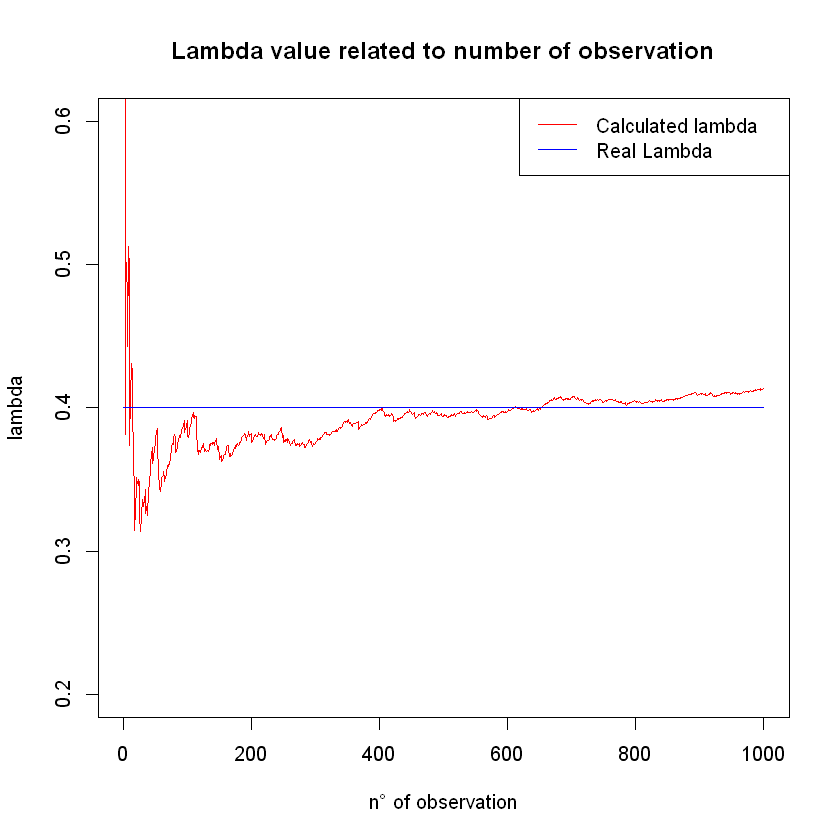

In [9]:
A=rexp(1000,0.4)
#length(A) # number of values in A
sumx=cumsum(A) # x1, x1+x2,x1+x2+x3 ...to calculate meanA for 1,2,3 ... element
barx=sumx/1:1000 # division a vector by a vector - division terme by term
esti_lambda = 1 / barx
par(mfrow=c(1,1))
plot(1:1000,esti_lambda,type='l',col='red',xlim=c(0,1001),ylim=c(0.2,0.6),main="Lambda value related to number of observation",xlab="n° of observation",ylab="lambda") # evolution of lambda estimation in fn of sample size
par(new=TRUE)
plot(c(0,1000),c(0.4,0.4),type='l',col='blue',xlim=c(0,1001),ylim=c(0.2,0.6),xlab="",ylab="") # in blue the "real" value
legend("topright" ,legend=c("Calculated lambda", "Real Lambda"), col=c("red", "blue","green"),lty = 1)



## Example 2.4 - 3 distribution graphes
* exponential distribution
* normal distribution
* uniforme distribution

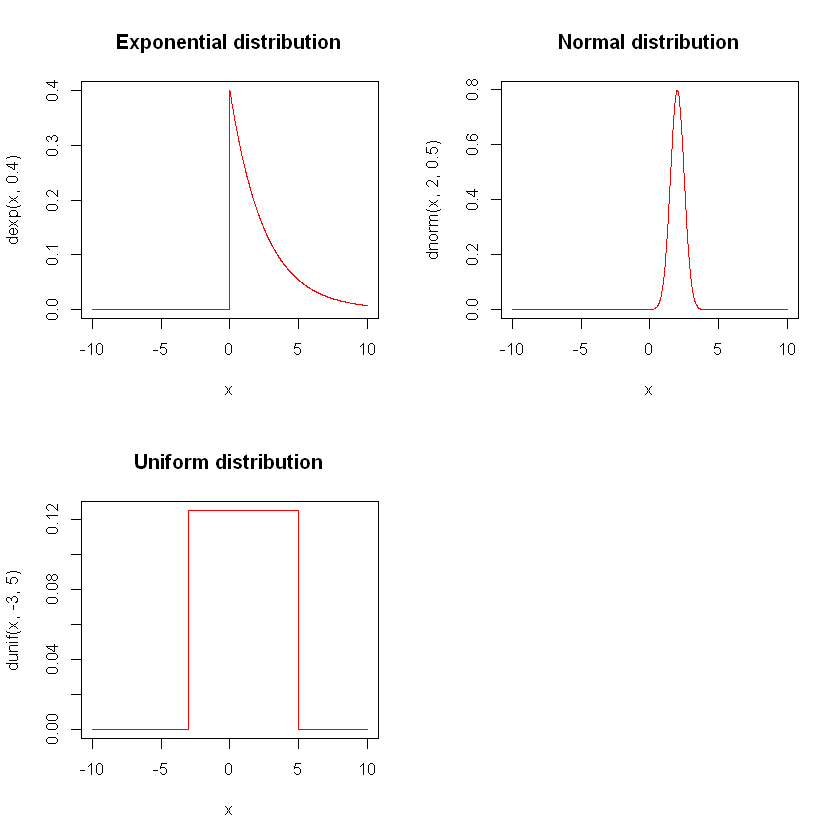

In [10]:
par(mfrow=c(2,2))
x=seq(-10,10,0.01)
plot(x,dexp(x,0.4),type='l',col='red',main="Exponential distribution") # exponential distribution
plot(x,dnorm(x,2,0.5),type='l',col='red',main="Normal distribution") # normal distribution
plot(x,dunif(x,-3,5),type='l',col='red',main="Uniform distribution") # uniform distribution

# Day 3
## Exemple 3.1 - Difference of distribution between Gaussian and Student
* Gaussian (normal distibution) in red
* Student (number of degree of liberty 2) in blue

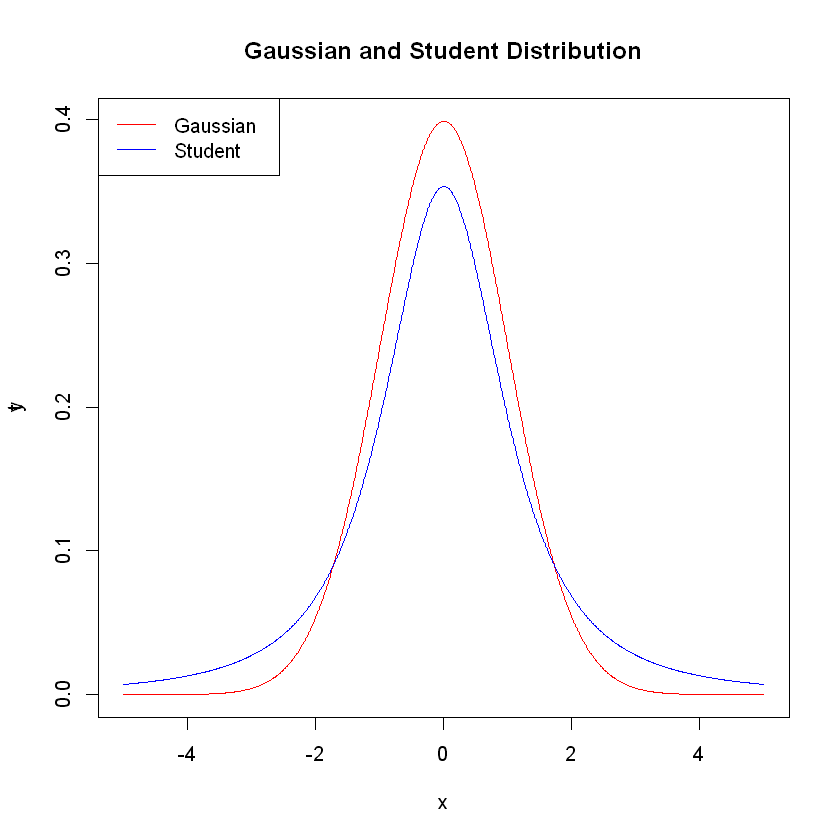

In [11]:

x=seq(-5,5,0.01)
y=dnorm(x)
t=dt(x,2)
maxy=max(y,t)
plot(x,y,type='l',col='red',xlim=c(-5,5),ylim=c(0,maxy),main="Gaussian and Student Distribution")
par(new=TRUE)
plot(x,t,type='l',col='blue',xlim=c(-5,5),ylim=c(0,maxy))
legend("topleft" ,legend=c("Gaussian", "Student"), col=c("red", "blue"),lty = 1)


## Example 3.2 - using R to compute Gaussian and Student Probabilies
    * pnorm (Gaussian), pt (Student) to get a probability knowing a value for the R.V
    * qnorm (Gaussian), qt (Student) to get a R.V value knowing the probability
    * take care, pnorm/qnorm use standard deviation and not variance as third parameter

In [12]:
# P(-0.28 <= Z <= 0.57)
sprintf ("P(-0.28 <= Z <= 0.57) for N(0,1) = %f" , pnorm(0.57)-pnorm(-0.28))
sprintf ("P(-0.2 <= Z <= 1.2) for N(1,4) = %f" , pnorm(1.2,1,2)-pnorm(-0.2,1,2))

sprintf ("P(-0.271 <= Z <= 0.271) for T(4) = %f" , pt(0.271,4)-pt(-0.271,4))
sprintf ("P(0,414 <= Z <= 1.19) for T(4) = %f" , pt(1.19,4)-pt(0.414,4))

sprintf ("t so that P( Z <= t) = 0,95 for N(0,1), t = %f" , qnorm(0.95))
sprintf ("t so that P( Z <= t) = 0,95 for N(1,4), t = %f" , qnorm(0.95,1,2))


[1] "P(-0.28 <= Z <= 0.57) for N(0,1) = 0.325922"

[1] "P(-0.2 <= Z <= 1.2) for N(1,4) = 0.265575"

[1] "P(-0.271 <= Z <= 0.271) for T(4) = 0.200199"

[1] "P(0,414 <= Z <= 1.19) for T(4) = 0.200131"

[1] "t so that P( Z <= t) = 0,95 for N(0,1), t = 1.644854"

[1] "t so that P( Z <= t) = 0,95 for N(1,4), t = 4.289707"

## Example 3.3 - Compare Student distribution when the degree of freedom is changing
* comparaison with 2,4 and 10 degree of freedom

[1] "value for which Probability for Student T(2) = 0.95 :  t= 1.885618"

[1] "value for which Probability for Student T(2) = 0.95 :  t= 1.533206"

[1] "value for which Probability for Student T(2) = 0.95 :  t= 1.372184"

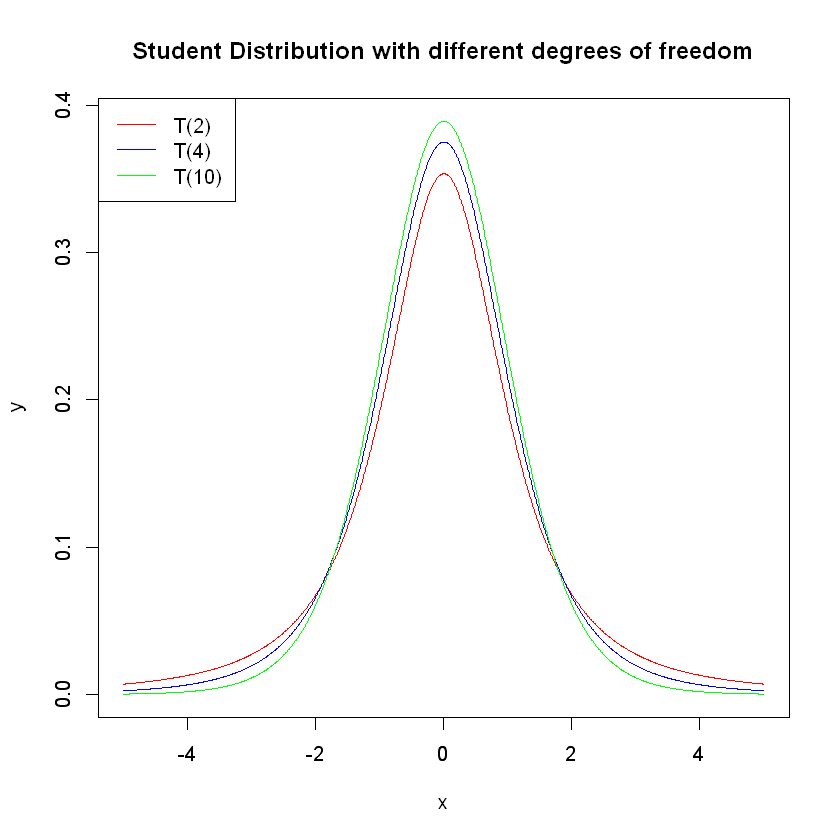

In [13]:
x=seq(-5,5,0.01)
y2=dt(x,2)
y4=dt(x,4)
y10=dt(x,10)
maxy=max(y2,y4,y10)
plot(x,y2,type='l',col='red',xlim=c(-5,5),ylim=c(0,maxy),ylab="y",main="Student Distribution with different degrees of freedom")
par(new=TRUE)
plot(x,y4,type='l',col='blue',xlim=c(-5,5),ylim=c(0,maxy),xlab="",ylab="")
par(new=TRUE)
plot(x,y10,type='l',col='green',xlim=c(-5,5),ylim=c(0,maxy),xlab="",ylab="")
legend("topleft" ,legend=c("T(2)", "T(4)","T(10)"), col=c("red", "blue","green"),lty = 1)
sprintf("value for which Probability for Student T(2) = 0.95 :  t= %f",qt(0.9,2))
sprintf("value for which Probability for Student T(2) = 0.95 :  t= %f",qt(0.9,4))
sprintf("value for which Probability for Student T(2) = 0.95 :  t= %f",qt(0.9,10))


## Exemple 3.4 - Showing that the Mean of a dataset can be outside of the calculated Confidence Interval
* but with a probability linked to the choice of alpha
* in the example, the simulation is a Normal distribution (mu=1,sd=2) and alpha = 0.05
* we suppose that the variance = 4 is known
* we run the simulation 100 times and check the number of times that mu is out of the calculated CI

In [14]:
#if you run it several times, you can have mu out of CI 
K=100
M=matrix(data=0,ncol=2,nrow=K) # one CI by row
for (i in 1:K)
{
  data=rnorm(1000,2,1) # normal mu=2 sd= 1
  # alpha = 5%, sd is known
  lowerbound = mean(data)-1/sqrt(1000)*qnorm(0.975)
  upperbound = mean(data)+1/sqrt(1000)*qnorm(0.975)
  CI =c(lowerbound,upperbound)
  M[i,]=CI
}
#M # we should have at most 5% of cases where mu outside of CI# counting when we are outside
B=(M[,1]>2)+(M[,2]<2)
sprintf("mu is out of CI %i times over %i. The maximum should be : %i times",sum(B),K,5) #number of sample where mu out of CI




[1] "mu is out of CI 4 times over 100. The maximum should be : 5 times"

## Example 3.5 - Is Max(Xi) a good approximation for N in a Binomail distribution(N,p) (as it is for Uniform Distribution)
* we simulate 10000 Binomial distribution sample (10,p) for p=0.8 and p=0.2
* for p=0.8, the Max(Xi) estimator is good (very close to 10)
* for p=0.2, the Max(Xi) estimator is not good
* the estimator is not good for p=0.2 because the probability to have a 10 value among the 10000 observations is very low

In [15]:
#binomial
D1=rbinom(10000,10,0.8) # N=10
sprintf("estimator of N (=10) for Binomial(10,0.8) : %f - very good",max(D1)) # ok
D2=rbinom(10000,10,0.2)
sprintf("estimator of N (=10) for Binomial(10,0.2) : %f - not good",max(D2)) # ok
sprintf("Probability to reach to have a sample = 10 with p=0.2 is very low : %f",0.2^10*10000) # ok


[1] "estimator of N (=10) for Binomial(10,0.8) : 10.000000 - very good"

[1] "estimator of N (=10) for Binomial(10,0.2) : 7.000000 - not good"

[1] "Probability to reach to have a sample = 10 with p=0.2 is very low : 0.001024"

# Day 4
## Example 4.1 Modelisation of dataset data1.txt

### Access to the file

In [16]:
getwd() # folder used at the moment
# to modify the default header : setwd(filename)
# dir() # to see the content of the current directory

[1] "C:/Users/erick/OneDrive - Data ScienceTech Institute/course/FSML2/R samples"

### use of read.table to read a file
* data1 is a data.frame (works as a list)
* use "header=TRUE or header = FALSE" depending if you have header in the file
* in our case there is no header => header = FALSE
* argument "set=" to fixe separator. For instance set=";" for a ";" separator
* in R by default the "." is used as a decimal separator. To change it dec = ','

In [17]:
data1 <- read.table("data1.txt", header = FALSE, sep = ",")
head(data1) # check that data's are ok

,V1
,<dbl>
1,0.5792213
2,1.7901780
3,0.3182912
4,1.5247270
5,2.2034720
6,0.5783241


* To access to the first observation within the data1 data.frame

In [18]:
sprintf("First row of dataset : %f",data1[1,])

[1] "First row of dataset : 0.579221"

* To Get the size of the dataset

In [19]:
sprintf("dimension of the dataset data1.txt : %i observations", dim(data1)[1])


[1] "dimension of the dataset data1.txt : 5000 observations"

### Looking at the datas we found that we have a quantitative and continuous variable

* the histogramme will be the correct representation
* as.matrix() transform the object into a matrix

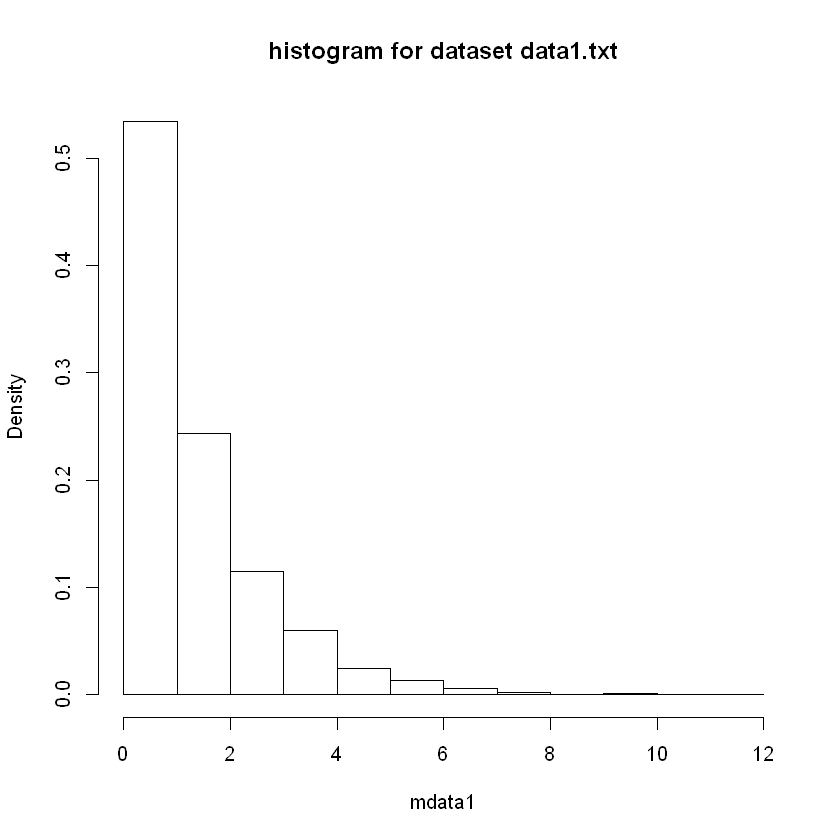

In [20]:
mdata1 = as.matrix(data1)
hist(mdata1,freq = FALSE,main="histogram for dataset data1.txt")




### We guess that it can be an exponential distribution
* we need to estimate the parameter lambda
* by method of moments an estimator lambda_1 = 1/mean(Xi)

In [21]:
lambda_1 = 1/mean(mdata1)
sprintf("An estimator lambda = %f",lambda_1)


[1] "An estimator lambda = 0.757914"

### Compare Theory and Practice

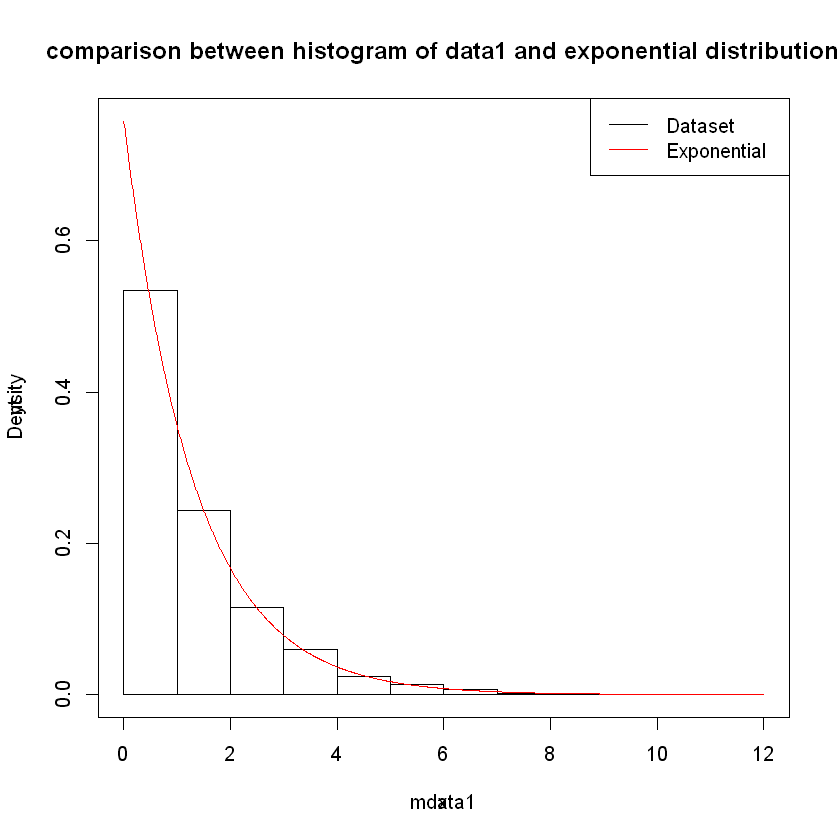

In [22]:
H=hist(mdata1,plot=FALSE)
limits = H$breaks
infl=min(limits) # minimum value of the dataset
subl=max(limits) # maximum value of the dataset
x=seq(infl,subl,0.01) #step small enough to have something smooth
yt=dexp(x,lambda_1) # theorical exponential distribution
yh=h$density
ymax=max(yt,yh)
hist(mdata1,freq=FALSE,xlim=c(infl,subl),ylim=c(0,ymax),main="comparison between histogram of data1 and exponential distribution")
par(new=TRUE)
plot(x,yt,type='l',col='red',xlim=c(infl,subl),ylim=c(0,ymax)) # exponential distribution
legend("topright" ,legend=c("Dataset", "Exponential"), col=c("black", "red"),lty = 1)



### The fit is good unless close to 0
* so we split the first classes and group the last ones to have a better graph

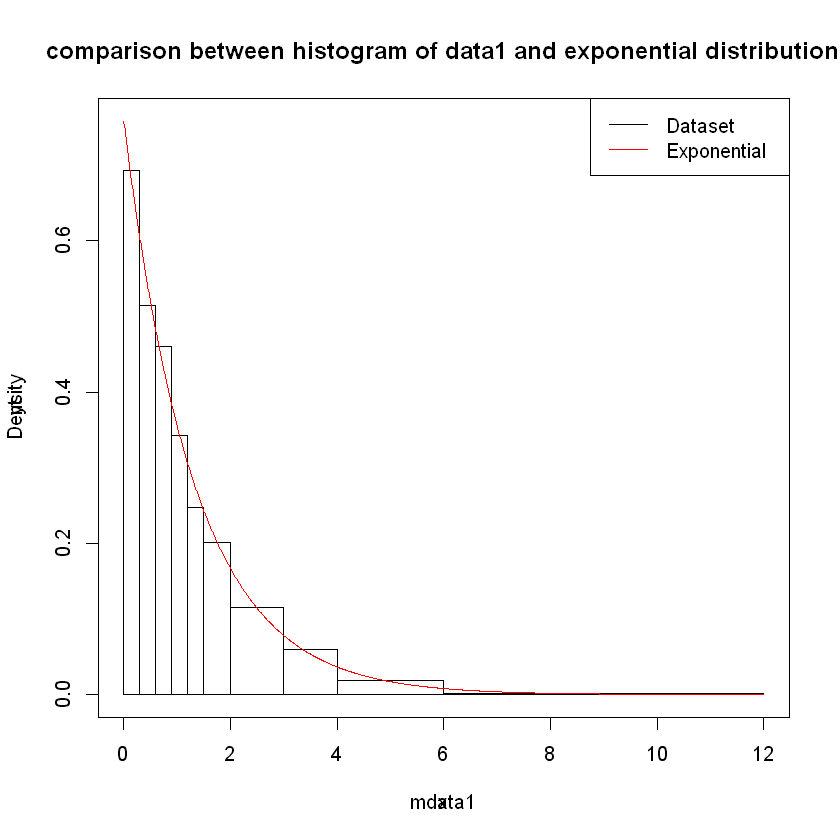

In [23]:
H=hist(mdata1,plot=FALSE)
limits = H$breaks
infl=min(limits)
subl=max(limits)
x=seq(infl,subl,0.01) #step small enough to have something smooth
yt=dexp(x,lambda_1)
yh=h$density
ymax=max(yt,yh)
hist(mdata1,breaks=c(0,0.3,0.6,0.9,1.2,1.5,2,3,4,6,12),freq=FALSE,xlim=c(infl,subl),ylim=c(0,ymax),main="comparison between histogram of data1 and exponential distribution")
par(new=TRUE)
plot(x,yt,type='l',col='red',xlim=c(infl,subl),ylim=c(0,ymax)) # exponential distribution
legend("topright" ,legend=c("Dataset", "Exponential"), col=c("black", "red"),lty = 1)


### Conclusion : our chose of an exponential distribution as a model seems to be ok

## Example 4.2 Modelisation of dataset data2.txt

### Looking at the datas we found that we have a quantitative and discrete variable


* discrete values => barplot
* the table function : count the occurences of each value / number of observation


[1] "dimension of the dataset data2.txt : 500 observations"

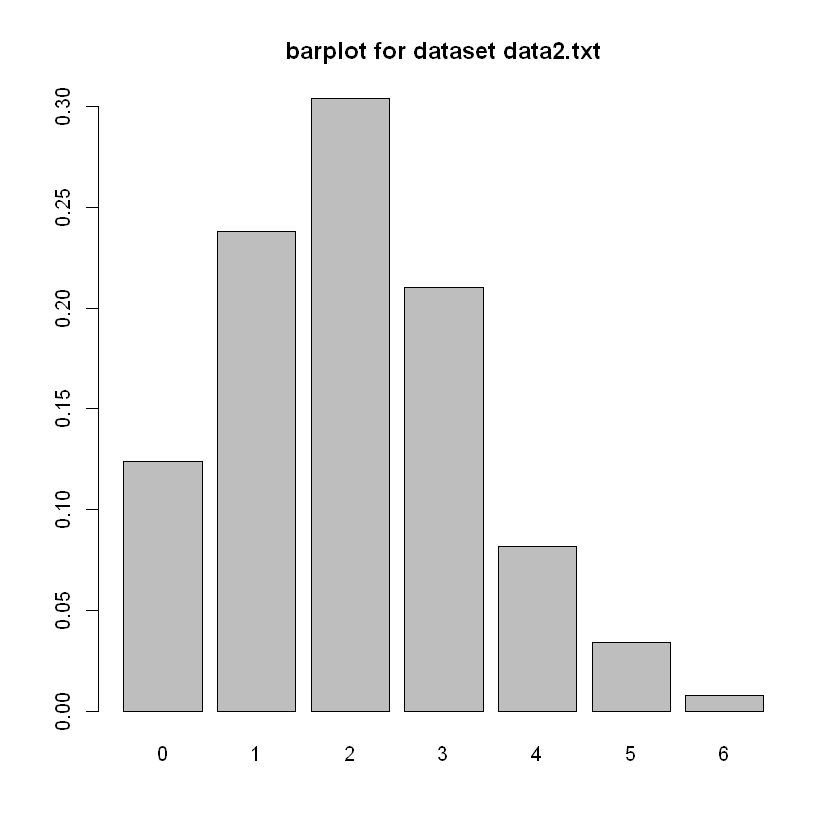

In [24]:
# dataset 2
data2 <- read.table("data2.txt", header = FALSE, sep = ",")
count=table(data2)
sprintf("dimension of the dataset data2.txt : %i observations", dim(data2)[1])
mdata2 = as.matrix(data2)
barplot(count / 500, main="barplot for dataset data2.txt")


### We guess that it can be either a binomial or a poisson distribution

* For Poisson, by method of moments, an estimator lambda_p is empirical mean
* For Binomial, by method of moment :
    1. p_b = (mu-var)/mu, 
    2. N_b =mu^2/(mu-var) - take care, N must be an insteger


In [25]:
lambda_p = mean(as.matrix(data2)) # an estimation - associated value to an estimator
sprintf("The lambda_p estimator for Poisson distribution = %f",lambda_p)

p_b = (mean(mdata2)-var(mdata2))/mean(mdata2)
N_b = mean(mdata2)/p_b # must be an integer
sprintf("The p_b and N_b estimators for binomial distribution are : p_b = %f and N_b = %f",p_b,N_b)
sprintf("Since N_b must be an integer, the new value will be N_b = 13 and p_b must be recalculated with this value")
N_b = 13
p_b = mean(mdata2)/N_b
sprintf("The new value of p_b is %f",p_b)


[1] "The lambda_p estimator for Poisson distribution = 2.022000"

[1] "The p_b and N_b estimators for binomial distribution are : p_b = 0.154830 and N_b = 13.059490"

[1] "Since N_b must be an integer, the new value will be N_b = 13 and p_b must be recalculated with this value"

[1] "The new value of p_b is 0.155538"

### We do graphical superposition to choose between Poisson and Binomial and compare the theory with the given dataset data2

data2
  0   1   2   3   4   5   6 
 62 119 152 105  41  17   4 

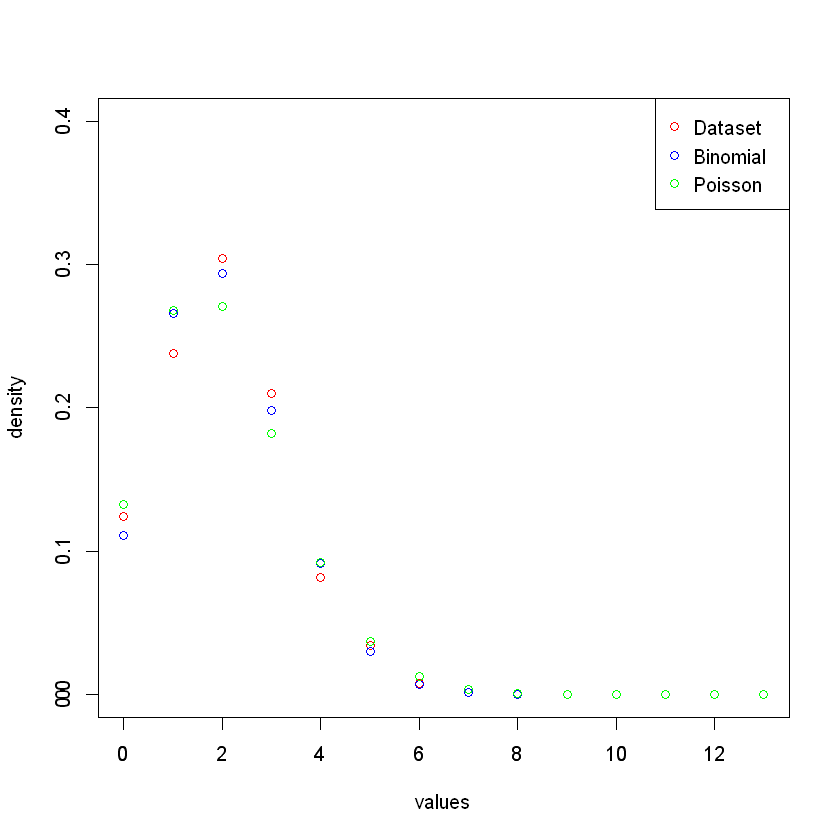

In [26]:
reality = count/500
plot(0:6,reality,col='red',type='p',xlim=c(0,13),ylim=c(0,0.4),xlab="values",ylab="density")

xx=0:N_b
par(new=TRUE)
Bin = dbinom(xx,N_b,p_b)
count_bin = table(Bin)
plot(xx,Bin,col='blue',type='p',xlim=c(0,13),ylim=c(0,0.4),xlab="",ylab="")

par(new=TRUE)
x=0:N_b
Pois = dpois(x,lambda_p)
count_pois = table(Pois)
#barplot(count_pois / 5000, col = 'blue')
plot(x,Pois,col='green',type='p',xlim=c(0,13),ylim=c(0,0.4),xlab="",ylab="")
legend("toprigh" ,legend=c("Dataset", "Binomial","Poisson"), col=c("red", "blue","green"),pch = c(1,1,1))




### Binomial is closer to the dataset so we choose the Binomial Distribution with p = 0.1555 and N = 13

* Difficult to choose between Poison and Binomial because Poison can be an approximation of Binomial

* Practicaly, it is easely to use Poisson (one parameter) than Binomial (two parameters)

## Tips to be sure that we have numerical values => try to add two values

In [27]:
x<-sample(1:10,50,replace=TRUE) # 
sprintf("addition of two values works x[1]+x[4] = %i",x[1]+x[4])
xf=as.factor(x)
sprintf("Here we have categorical values looking like numerical values - see Levels information between the table")
head(xf) # here level = categorical
sprintf("If we try to add two values we get an error")
xf[4]+xf[1]

[1] "addition of two values works x[1]+x[4] = 15"

[1] "Here we have categorical values looking like numerical values - see Levels information between the table"

[1] 6 1 1 9 4 5
Levels: 1 2 3 4 5 6 7 8 9 10

[1] "If we try to add two values we get an error"

Warning message in Ops.factor(xf[4], xf[1]):
"'+' not meaningful for factors"


[1] NA

### Available dataset in R : iris database
* help("iris") : gives detailled information on the dataset

In [28]:
head(iris)
#help("iris")

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


## Example 4.3 Calculation of Khi square with R


In [29]:
sprintf(" Calculation of a Khi square probability using pchisq : %f",pchisq(1.21,7)) # t=1.21, 7 degree liberty
sprintf(" Calculation of a t value, the probabily being given : %f",qchisq(0.9,7))

[1] " Calculation of a Khi square probability using pchisq : 0.009305"

[1] " Calculation of a t value, the probabily being given : 12.017037"

### how to get information on statistical function in R
* start the general help : help.Start()
* browse into the packages
* open the "stats"package

# Exercices Day 4

## Exercice 4.1 dataset 3

       V1       
 Min.   : 6.00  
 1st Qu.:10.00  
 Median :11.00  
 Mean   :10.58  
 3rd Qu.:11.00  
 Max.   :12.00  

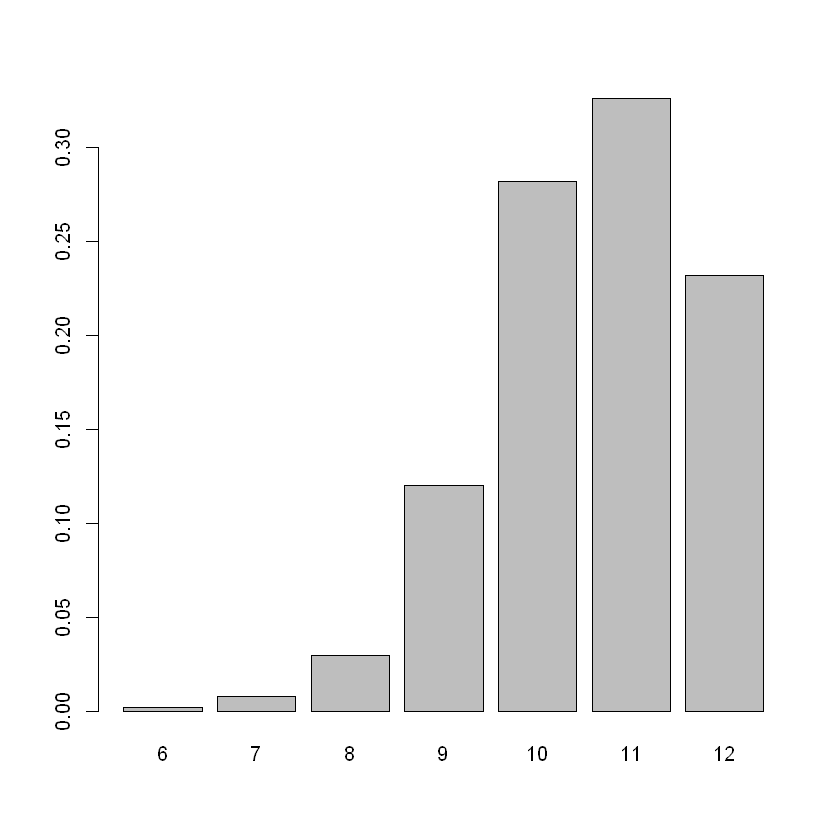

[1] "The p_b and N_b estimators for binomial distribution are : p_b = 0.880275 and N_b = 12.016697"

[1] "Since N_b must be an integer, the new value will be N_b = 12 and p_b must be recalculated with this value"

[1] "Red curve better fit the real curve (blue) => we can estimate that it is a binomial distribution with p = 0.881500 and N = 12.000000"

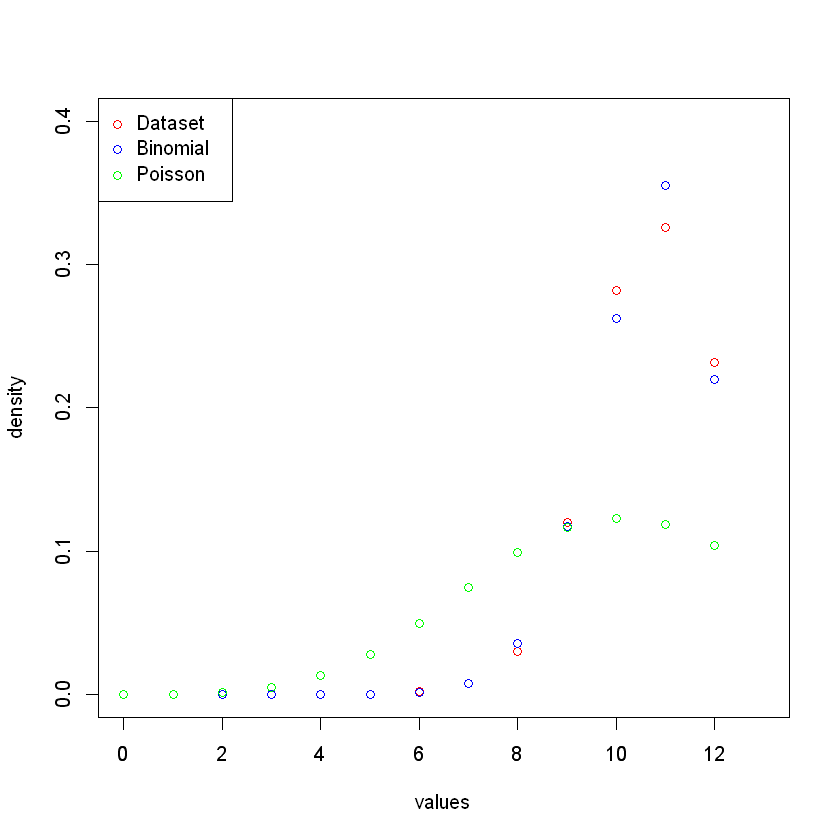

In [11]:
df3 <- read.table("C:\\Users\\erick\\OneDrive - Data ScienceTech Institute\\course\\FSML2\\R samples\\data3.txt", header = FALSE, sep = ",")
A3 = as.matrix(df3)
summary(A3) 
reality = table(A3)/500
barplot(reality)
x=6:12

plot(x,reality,col='red',type='p',xlim=c(0,13),ylim=c(0,0.4),xlab="values",ylab="density")


p_b = (mean(A3)-var(A3))/mean(A3)
N_b = mean(A3)/p_b # must be an integer
sprintf("The p_b and N_b estimators for binomial distribution are : p_b = %f and N_b = %f",p_b,N_b)
sprintf("Since N_b must be an integer, the new value will be N_b = 12 and p_b must be recalculated with this value")
N_b = 12
p_b = mean(A3)/N_b

xx=0:N_b
par(new=TRUE)
Bin = dbinom(xx,N_b,p_b)
count_bin = table(Bin)
plot(xx,Bin,col='blue',type='p',xlim=c(0,13),ylim=c(0,0.4),xlab="",ylab="")

par(new=TRUE)
x=0:12
Pois = dpois(x,lambda)
count_pois = table(Pois)
#barplot(count_pois / 5000, col = 'blue')
plot(x,Pois,col='green',type='p',xlim=c(0,13),ylim=c(0,0.4),xlab="",ylab="")
legend("topleft" ,legend=c("Dataset", "Binomial","Poisson"), col=c("red", "blue","green"),pch = c(1,1,1))
sprintf("Red curve better fit the real curve (blue) => we can estimate that it is a binomial distribution with p = %f and N = %f",p_b,N_b)


## Exercice 4.2 Dataset 4

       V1         
 Min.   :-6.1644  
 1st Qu.:-0.4391  
 Median : 0.5817  
 Mean   : 0.5783  
 3rd Qu.: 1.5857  
 Max.   : 7.3608  

[1] "we can estimate that it is a normal distribution with mu = 0.578265 and sigma = 1.504153"

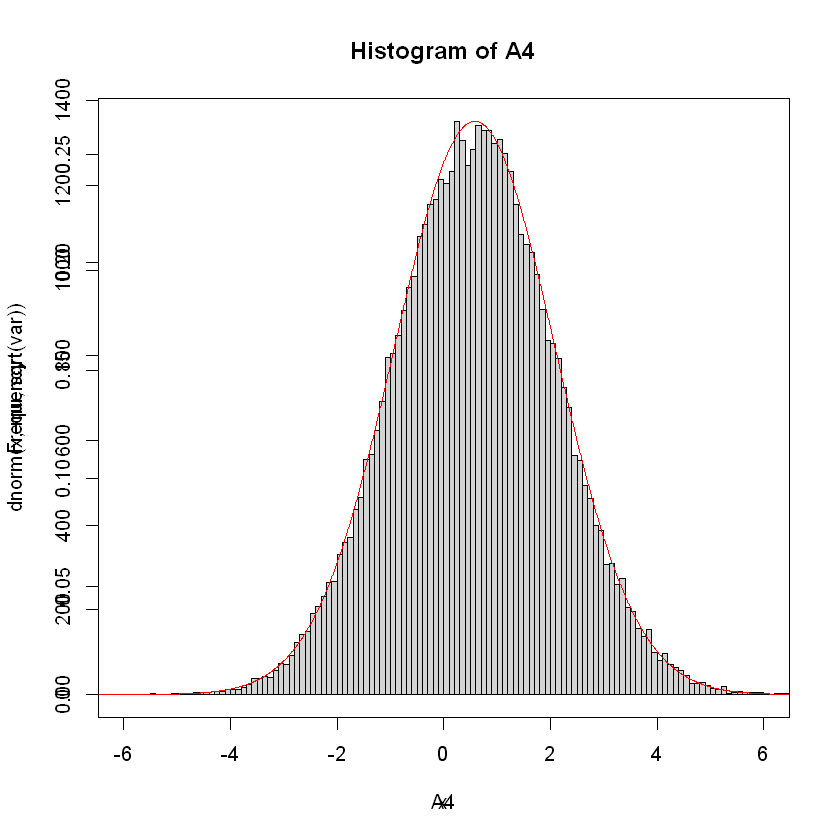

In [12]:
# dataset 4
df4 <- read.table("C:\\Users\\erick\\OneDrive - Data ScienceTech Institute\\course\\FSML2\\R samples\\data4.txt", header = FALSE, sep = ",")
A4 = as.matrix(df4)
summary(A4) 
hist(A4,breaks=100,xlim=c(-6,6)) 
mu = mean(A4) 
var = var(A4)
x=seq(-10,10,0.01)
par(new=TRUE)
plot(x,dnorm(x,mu,sqrt(var)),type='l',col='red',xlim=c(-6,6)) 
sprintf("we can estimate that it is a normal distribution with mu = %f and sigma = %f",mu,sqrt(var))



## Exercice 4.3 - reading normal values on the Normal Table
* X ~ N(-1,4)
* calculate P(X<= 0), P(X>= -1.5), P(-1.2<=X<=0.8)
* found t so that P(X<=t) = 0.9, P(X>=t)=0.95, P(-1-t<=X<=-1+t)=0.95

Using the table of N(0,1),  Y = (X-1)/2
* P(X<= 0) <=> P(Y<=0.5) = 0,6915
* P(X>= -1.5) <=> P(Y>= -0.25) = P(Y<= 0.25) = 0.5987
* P(-1.2<=X<=0.8) <=> P(-0.1<=Y<=0.9) = P(Y<=0.9)-P(Y<=-0.1) = P(Y<=0.9)-(1 - P(Y<=0.1)) = 0,3557
* P(X<=t) = 0.9 <=> P(Y<=(t+1)/2)=0.9 => (t+1)/2 = 1.2816, t =1.562
* P(X>=t)=0.95 => P(X<=t)=0.05 => P(Y<=(t+1)/2)=0.05 P(-Y<=(t+1)/2)=0.95 (t+1)/2=-1,645 => t=-4,29
* P(-1-t<=X<=-1+t)=0.95 => P(X<=-1+t)-P(X<=-1-t)=0.95=>P(Y<=t/2)-P(Y<=-t/2)=0.95=> 2*P(Y<=t/2)-1=0.95=>P(Y<=t/2)<=0.975,t=3.92

In [46]:
sprintf("X ~ N(-1,4), P(X<=0) = %f",pnorm(0,-1,2))
sprintf("X ~ N(-1,4), P(X>=-1.5) = %f",1-pnorm(-1.5,-1,2))
sprintf("X ~ N(-1,4), P(-1.2<=X<=0.8) = %f",pnorm(0.8,-1,2)-pnorm(-1.2,-1,2))
sprintf("X ~ N(-1,4), t s.t P(X<=t) = 0.9, t = %f",qnorm(0.9,-1,2))
sprintf("X ~ N(-1,4), t s.t P(X>=t) = 0.95, t = %f",-qnorm(0.95,-1,2)-2)
sprintf("X ~ N(-1,4), t s.t P(-1-t<=X<=-1+t) = 0.95, t = %f",qnorm(0.975,-1,2)+1)

[1] "X ~ N(-1,4), P(X<=0) = 0.691462"

[1] "X ~ N(-1,4), P(X>=-1.5) = 0.598706"

[1] "X ~ N(-1,4), P(-1.2<=X<=0.8) = 0.355768"

[1] "X ~ N(-1,4), t s.t P(X<=t) = 0.9, t = 1.563103"

[1] "X ~ N(-1,4), t s.t P(X>=t) = 0.95, t = -4.289707"

[1] "X ~ N(-1,4), t s.t P(-1-t<=X<=-1+t) = 0.95, t = 3.919928"

### Exercice 4.4 - reading normal values on the Khi two table
* C ~ X2(11)
* calculate P(C<= 17.275), P(C>= 4.575), P(3.053<=C<=21.92)
* found f so that P(C<=f) = 0.9, P(C>=f)=0.9
### Using the table of X2(11)
* P(C <= 17.125) = 0.9
* P(C >= 4.575 ) = 0.95
* P(3.053 <= C <= 21.92) = P(C <= 21.92)-P(C <= 3.053 ) = 0.965
* P(C <= f) = 0.9 <=> f = 17.275
* P(C >= f) = 0.9 <=> f = 5.578


In [57]:
sprintf("X ~ X2(11), P(C <= 17.125) = %f",pchisq(17.125,11))
sprintf("X ~ X2(11), P(C >= 4.575) = %f",1-pchisq(4.575,11))
sprintf("X ~ X2(11), P(3.053 <= C <= 21.92) = %f",pchisq(21.92,11)-pchisq(3.053,11))
sprintf("X ~ X2(11), t s.t P(C<=f) = 0.9, t = %f",qchisq(0.9,11))
sprintf("X ~ X2(11), t s.t P(C>=f) = 0.9, t = %f",qchisq(0.1,11))

[1] "X ~ X2(11), P(C <= 17.125) = 0.895768"

[1] "X ~ X2(11), P(C >= 4.575) = 0.949992"

[1] "X ~ X2(11), P(3.053 <= C <= 21.92) = 0.965006"

[1] "X ~ X2(11), t s.t P(C<=f) = 0.9, t = 17.275009"

[1] "X ~ X2(11), t s.t P(C>=f) = 0.9, t = 5.577785"

### Exercice 4.5 - reading normal values on the Student table
* C ~ T(5)
* calculate P(abs(T)<= 0.92), P(T<= 2.015), P(T>=3.365)
* found z so that P(T>=z) = 0.4, P(T<=z)=0.05, P(-z <= T <= z) = 0.3
### Using the table of T(5)
* P(abs(T)<= 0.92) = 1-0.4 = 0.6
* P(T<= 2.015) = 1- 0.10/2 = 0.95
* P(T>=3.365) = 0.02/2=0.01
* P(T>=z) = 0.4, z = 0.267
* P(T<=z)=0.05, z = - 2.015 (value for 0.10)
* P(-z <= T <= z) = 0.3, z = 0.408


In [66]:
sprintf("X ~ T(5), P(abs(T) <= 0.92) = %f",2*pt(0.92,5)-1)
sprintf("X ~ T(5), P(T <= 2.015) = %f",pt(2.015,5))
sprintf("X ~ T(5), P(T >= 3.365) = %f",1-pt(3.365,5))
sprintf("X ~ T(5), t s.t P(T>=z) = 0.4, t = %f",qt(1-0.4,5))
sprintf("X ~ T(5), t s.t P(T<=z) = 0.05, t = %f",qt(0.05,5))
sprintf("X ~ T(5), t s.t P(-z <= T <= z) = 0.3, t = %f",qt((1+0.3)/2,5))


[1] "X ~ T(5), P(abs(T) <= 0.92) = 0.600217"

[1] "X ~ T(5), P(T <= 2.015) = 0.949997"

[1] "X ~ T(5), P(T >= 3.365) = 0.009999"

[1] "X ~ T(5), t s.t P(T>=z) = 0.4, t = 0.267181"

[1] "X ~ T(5), t s.t P(T<=z) = 0.05, t = -2.015048"

[1] "X ~ T(5), t s.t P(-z <= T <= z) = 0.3, t = 0.408229"

## Exercice 4.6 - find a confident interval for the Bernouilli Distribution
one of the used solution is : sqrt(p*(1-p))* qnorm(1-alpha/2)/sqrt(n)
Simulation of a Bernouilli distribution and check of the found confident interval formula

In [118]:
p = 0.01  # Bernouilli parameter
sample = 1000 # number of samples in one distribution
test = 100000 # number of repeated simulation
alpha = 0.05  # confident interval
# matrix with all the Bernouilli's distribution
rv = matrix(rbinom(sample*test,1,p),ncol=sample)
mn = apply(rv,1,mean)
#caclulation of the theoritical confident interval
interval = sqrt(p*(1-p))* qnorm(1-alpha/2)/sqrt(sample)
sprintf("Calculation done with p = %f,alpha = %f",p,alpha)
mask1 = (mn >= (p+interval))
mask2 = (mn <= (p-interval))
mn = mn[mask1 | mask2 ]
prob = 1 - (length(mn) / test )
sprintf("The calculated probability to be in this interval with the simulated distribution is %f",prob)


[1] "Calculation done with p = 0.010000,alpha = 0.050000"

[1] "The calculated probability to be in this interval with the simulated distribution is 0.964640"

# Day 5

using the datafile "Dataset_ozone.txt"
* T9 at T15   : temperature at different hours of the day
* Ne9 at Ne15 : clouds level at different hours of the day
* Vx9 at Vx15 : wind level at different hours of the day
* vent        : wind orientation, north, east ..
* pluie       : rain
* maxO3       : ozone concentration
* maxO3v      : ozone concentration day before

## See if there is a link between max03 and T12

In [260]:
A=read.table('Dataset_ozone.txt',header=TRUE,dec=',',sep=';')
head(A)

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,601,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,Nord,Sec
2,602,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,Nord,Sec
3,603,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,Est,Sec
4,604,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,Nord,Sec
5,605,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,Ouest,Sec
6,606,80,17.7,19.8,18.3,6,6,7,-5.6382,-5.0000,-6.0000,94,Ouest,Pluie


Plot the relation between T12 and max03 and get the "linear regression" object with lm function


Call:
lm(formula = A$maxO3 ~ A$T12)

Coefficients:
(Intercept)        A$T12  
    -27.420        5.469  


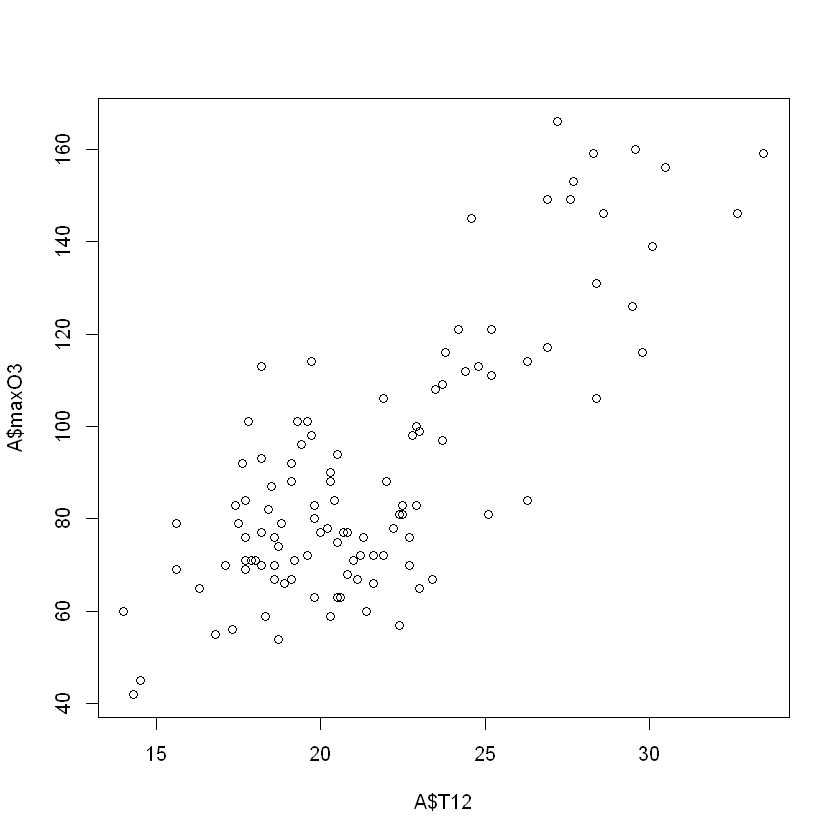

In [127]:
plot(A$T12,A$maxO3)
#some kind of linear tendency
L=lm(A$maxO3~A$T12)
L

* a = -27.420 = intercept, b = 5.469 = slope
* a,b depends on the dataset
* if the dataset is change and the last element is removed then :
* a = -28.022, b= 5.491

In [129]:
#a = -27.420 = intercept, b = 5.469 = slope
# a,b depends on the dataset
L1=lm(A$maxO3[-1]~A$T12[-1])
L1


Call:
lm(formula = A$maxO3[-1] ~ A$T12[-1])

Coefficients:
(Intercept)    A$T12[-1]  
    -28.022        5.491  


* summary(L) gives lot of different information on the linear regression

In [130]:
summary(L)


Call:
lm(formula = A$maxO3 ~ A$T12)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.079 -12.735   0.257  11.003  44.671 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -27.4196     9.0335  -3.035    0.003 ** 
A$T12         5.4687     0.4125  13.258   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.57 on 110 degrees of freedom
Multiple R-squared:  0.6151,	Adjusted R-squared:  0.6116 
F-statistic: 175.8 on 1 and 110 DF,  p-value: < 2.2e-16


It is possible to get access to this parameters

In [133]:
coef<-coef(L) # extract of some object of L

from the coeff, we can make predictions

In [134]:
coef%*%matrix(data=c(1,3),ncol=1) # matricial product : %*%

-11.01358


Confident interval supposing that the noise is Gaussian

In [136]:
confint(L,level=0.90) # symetrical CI

,5 %,95 %
(Intercept),-42.40461,-12.43466
A$T12,4.78443,6.15294


### relation between a and b in the cofident interval

In [ ]:
library(ellipse)

The confident interval is not a rectangle as we could think but an ellipse

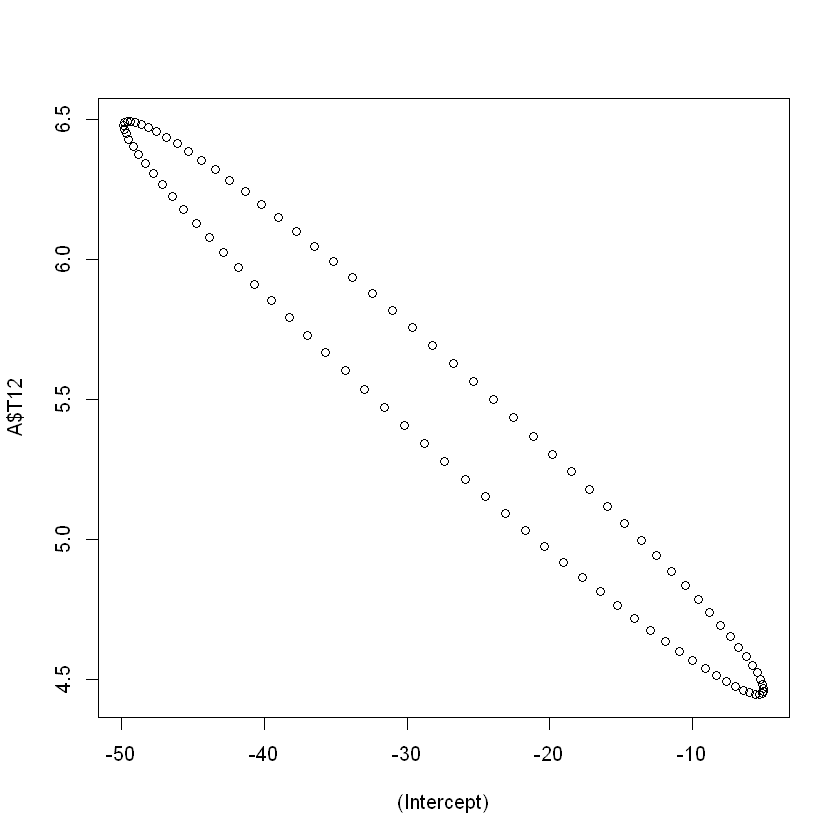

In [138]:
plot(ellipse(L,c(1,2),level = 0.95))

### difference between a and b , and estimated a and b
we simulate a dataset with (a = 1 and b= 2) including some gaussian noise
The result of the estimation is : 
* a= 1.008
* b= 2.005

In [142]:
x=runif(20,0,4)
y=1+2*x+rnorm(20,0,0.1) # true of a 1, b 2
lm(y~x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
      1.008        2.005  


### calculation done by R with lm

In [146]:
num=sum((x-mean(x))*(y-mean(y)))
den=sum((x-mean(x))^2)
sprintf("value for b : %f",num/den)
sprintf("value for a : %f",mean(y)-num/den*mean(x)) #intercept

[1] "value for b : 2.004724"

[1] "value for a : 1.007621"

### use of Multiple R-Square
* close to 1 => good linear model
* close to 0 => poor linear model

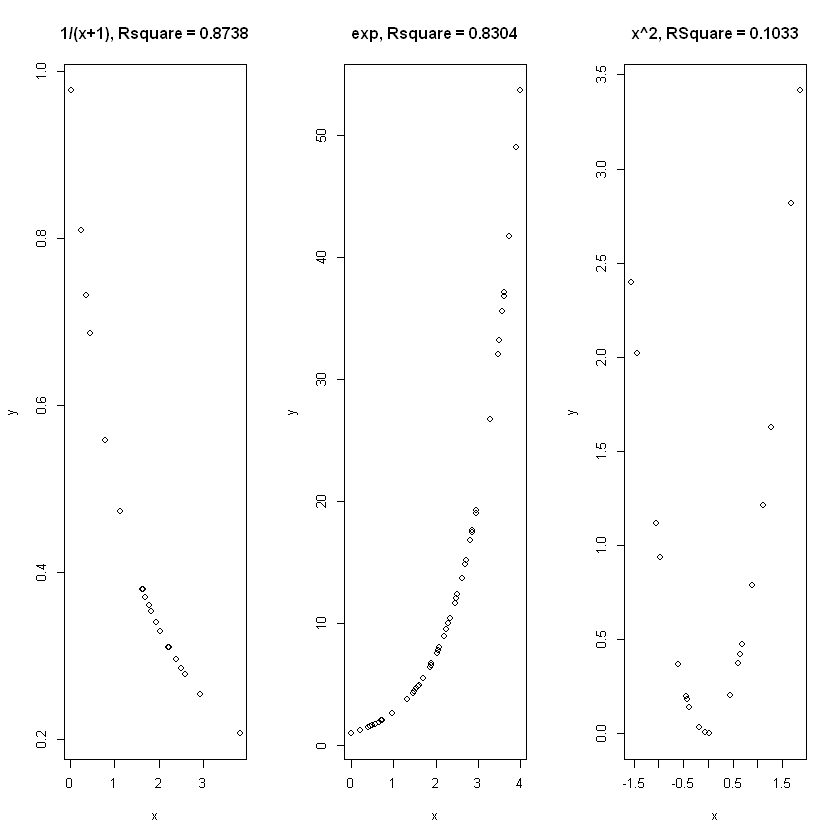

In [164]:
#same X
par(mfrow=c(1,3))
x=runif(20,0,4)
y = 1 / (x+1)
plot(x,y,main="1/(x+1), Rsquare = 0.8738") # we can imagine a linear regression here
Lm=lm(y~x)
#Summary(Lm)

#Multiple R squared = 0.9466
x=runif(50,0,4)
y=exp(x) #
plot(x,y,main="exp, Rsquare = 0.8304")
Lm1=lm(y~x)
#Summary(Lm)
# two line : one at the beginning one at the end
# ok but Multiple R-squared = 0.6365 (decrease / before) ....
x=runif(20,-2,2)
y=x^2#
plot(x,y,main="x^2, RSquare = 0.1033")
Lm2=lm(y~x)
#Summary(Lm)
# R-squared close to 0
# => not because you can model it linear that it is the good one !!!


# Exercices Day 5

In [1]:
T=20*60
lambda=0.4
n=rpois(1,0.4*T)
B=sort(runif(n,0,T))

In [5]:
Delta<-function(B){
l = c()
for (i in c(1:length(B)-1)) {
l <- c(l,B[i+1]-B[i]) }
return(l)
}

Delta2<-function(B){
l = rep(0,60)
for (i in c(1:length(B)-1)) {
l[B[i]%/%20] = l[B[i]%/%20]+1 }
return(l)
}

length(B)/(B[length(B)] - B[1])
length(B)/1200

[1] 0.4142818

[1] 0.4125

# Day 6
## Simulation of a gaussian noise with rnorm function
Generation of the "linear regression" object and printing of the prediction line

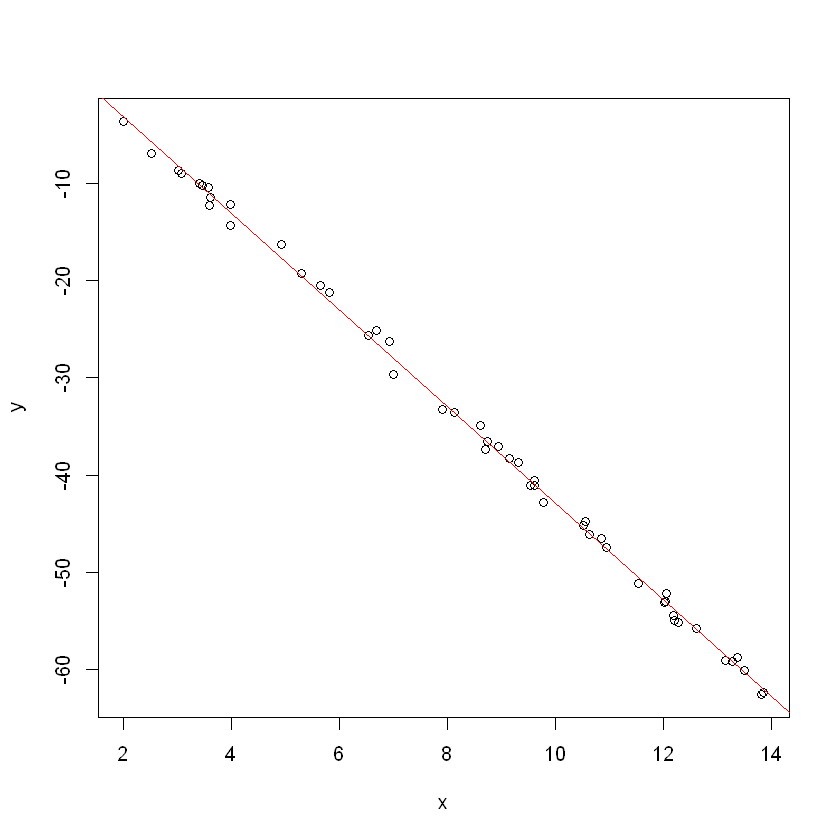

In [94]:
x=runif(50,2,14)
y=7-5*x+rnorm(50,0,1)
plot(x,y)
L=lm(y~x)
abline(L,col='red') # regression line

Printing of the different graphs linked with the "linear regression" object

## How to check that the assumptions regarding the noise are validate

### the first graph "Residuals vs Fitted" helps understand if the noise is centered by checking that the residuals are symetrically distributed up and down the dotted line. The red line is somehow a mean of this residuals and should be "close" to the dotted line

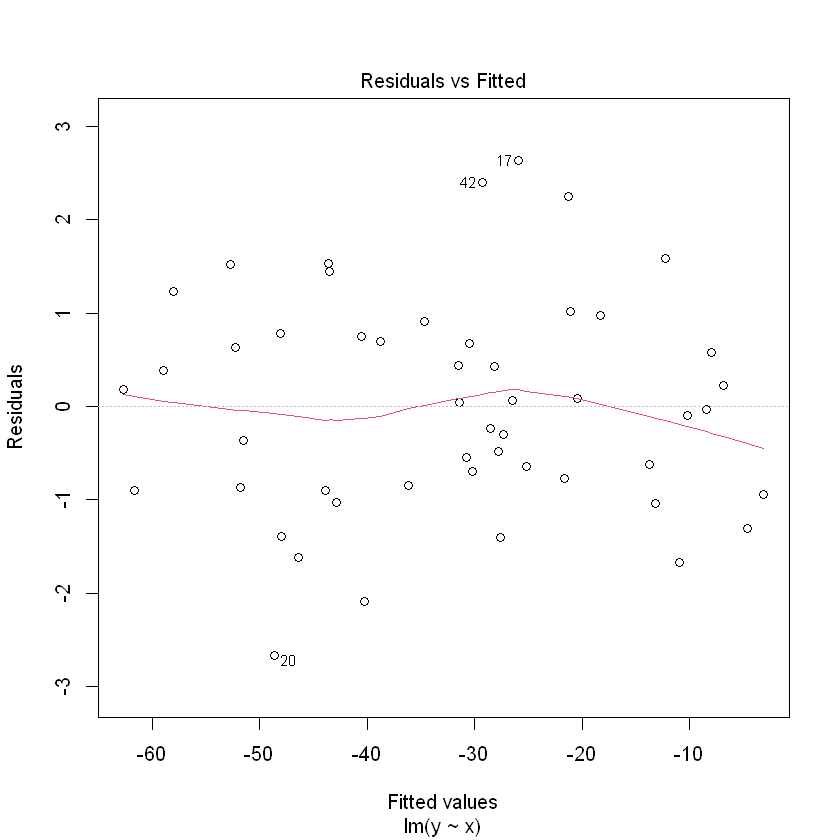

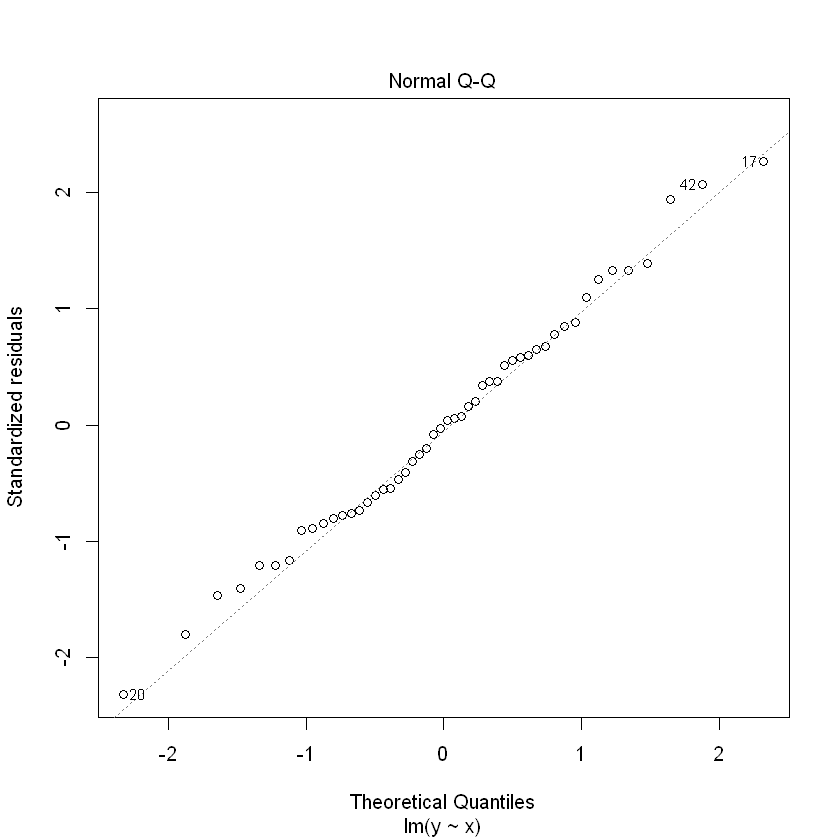

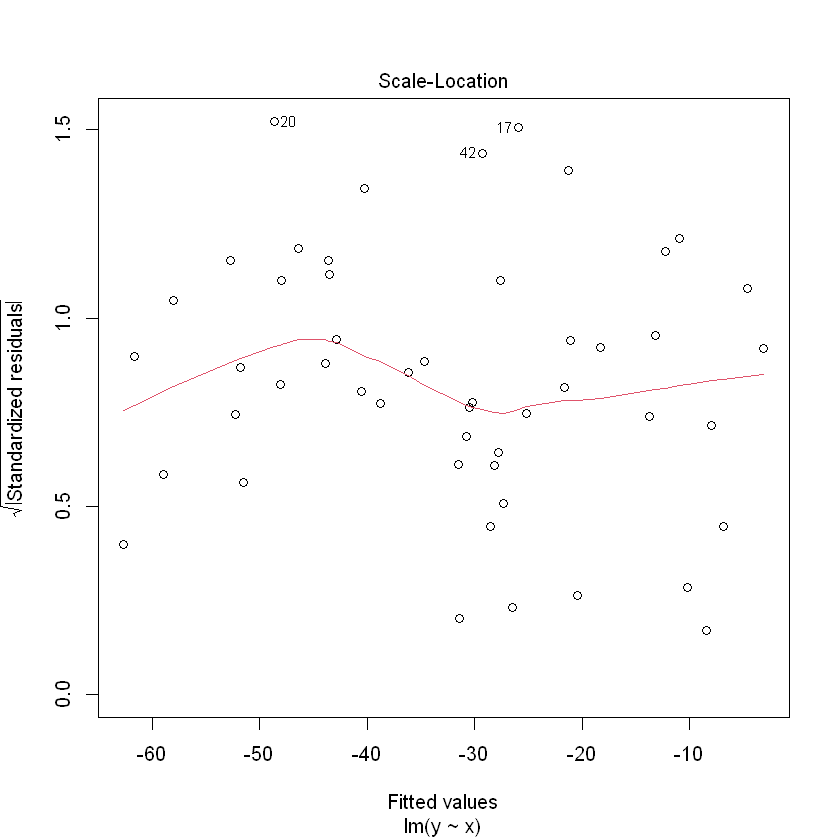

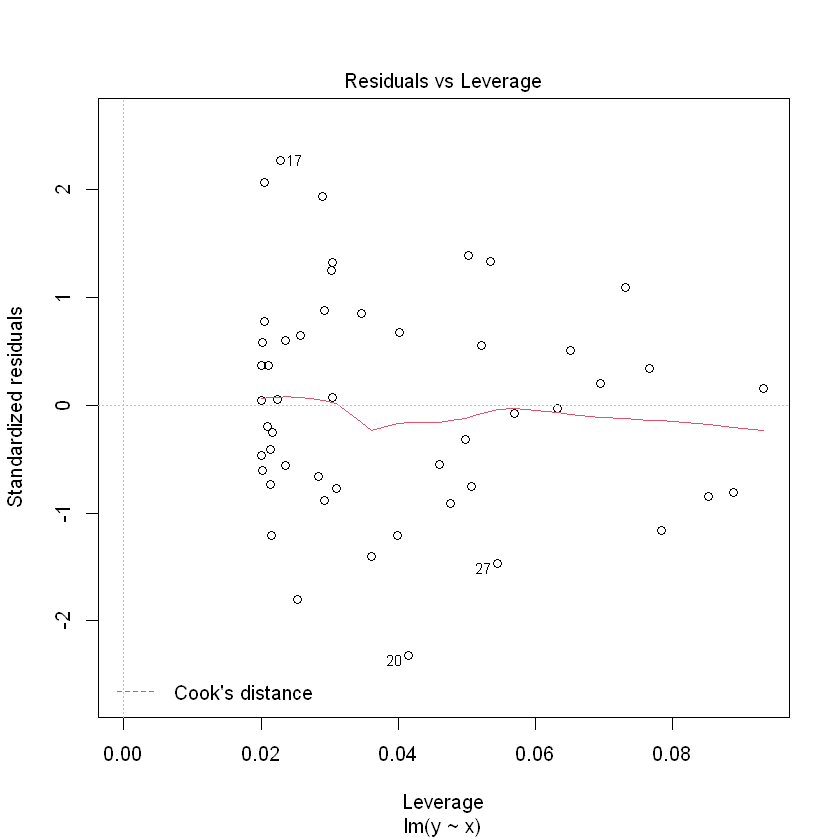

In [11]:
plot(L)

list the vailable variables generated by lm function

In [13]:
names(L)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [ ]:
use the "residuals" and "fitted.values" variable to make a plot
* sorted prediction and the residual ( with the same index as prediction)
* do the cumulated sum on residuals
* the cumulated sum is a way to check that we are not getting too far from 0

9            45             3             7            48 
 1.786502e-01 -3.621050e-01 -1.135072e-01  2.237793e-01  4.830622e-01 
           37            26            22            20            38 
 5.081863e-01  3.121130e-01  2.277283e-01 -9.331106e-02 -6.232734e-03 
           50            13            49             6            44 
-1.318212e-01 -2.556616e-01 -3.048558e-01 -1.736496e-01 -6.601931e-02 
           31            21            41            18            46 
-1.259736e-01 -7.451121e-02 -1.864005e-01 -1.400674e-01 -1.755908e-01 
            2            33            34             4            36 
-1.240551e-01 -9.869566e-02 -9.233536e-02 -1.111553e-01 -7.975796e-02 
           15            42            12            30             8 
-1.035754e-01 -1.083121e-02 -1.871625e-02 -3.222461e-03 -1.905316e-02 
           32            14            10            17            16 
-6.376391e-02 -7.106810e-02 -6.701468e-02  1.227968e-02 -6.513991e-03 
           43            23            39            24             1 
-2.768972e-02  3.367733e-02  5.966983e-02  6.019855e-02  8.311542e-02 
           40             5            35            27            11 
 6.583562e-02  3.945495e-02  7.541876e-02  3.572792e-02  3.288966e-02 
           25            47            19            28            29 
 3.146282e-02  4.314711e-02  4.697616e-02  1.930876e-02 -6.578071e-17

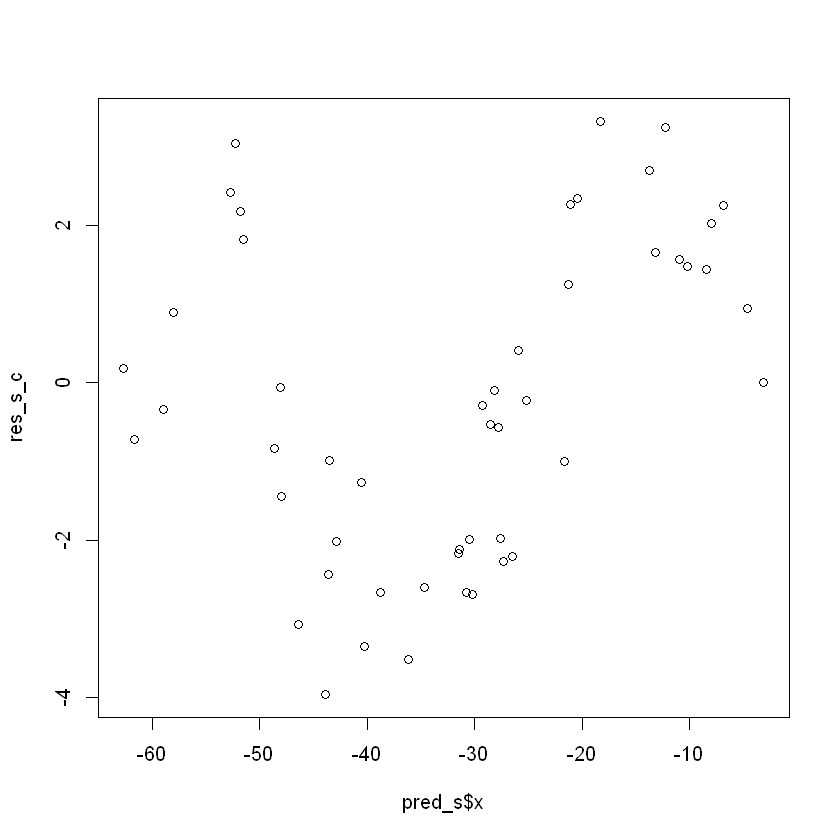

In [34]:
res=L$residuals
pred=L$fitted.values
pred_s=sort(pred,index.return=TRUE)
res_s=res[pred_s$ix]
res_s_c=cumsum(res_s)
res_s_c/(1:50) # cumulative mean
plot(pred_s$x,res_s_c)

### check the homosudasticity
    we look again at the "residual vs fitted" graph to check that there is no increasing or decreasing of the dispersion of residuals when the fitted values are increasing

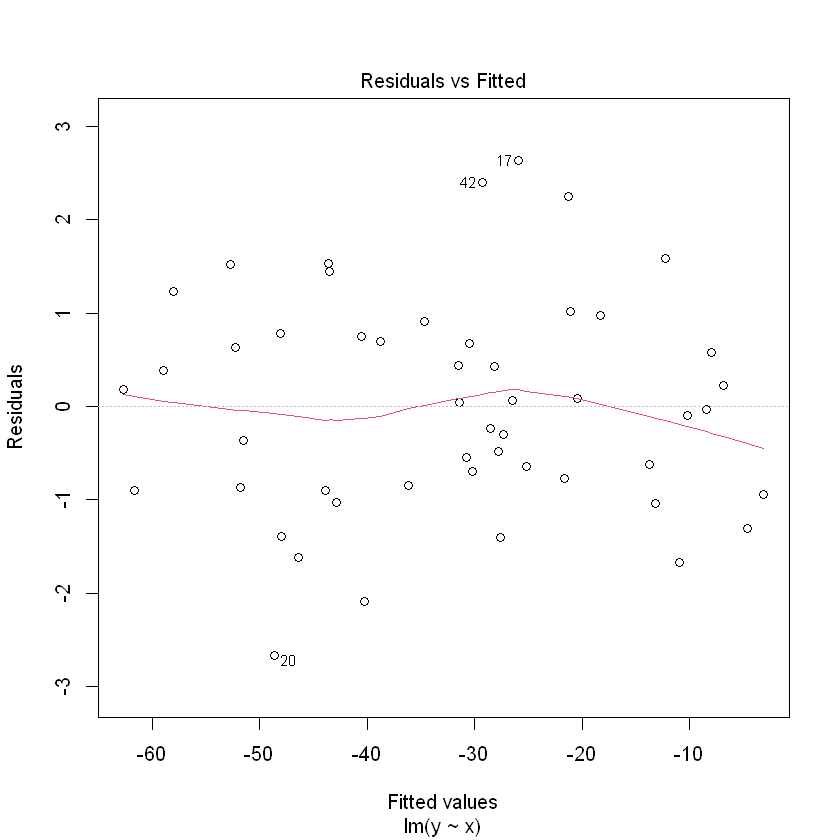

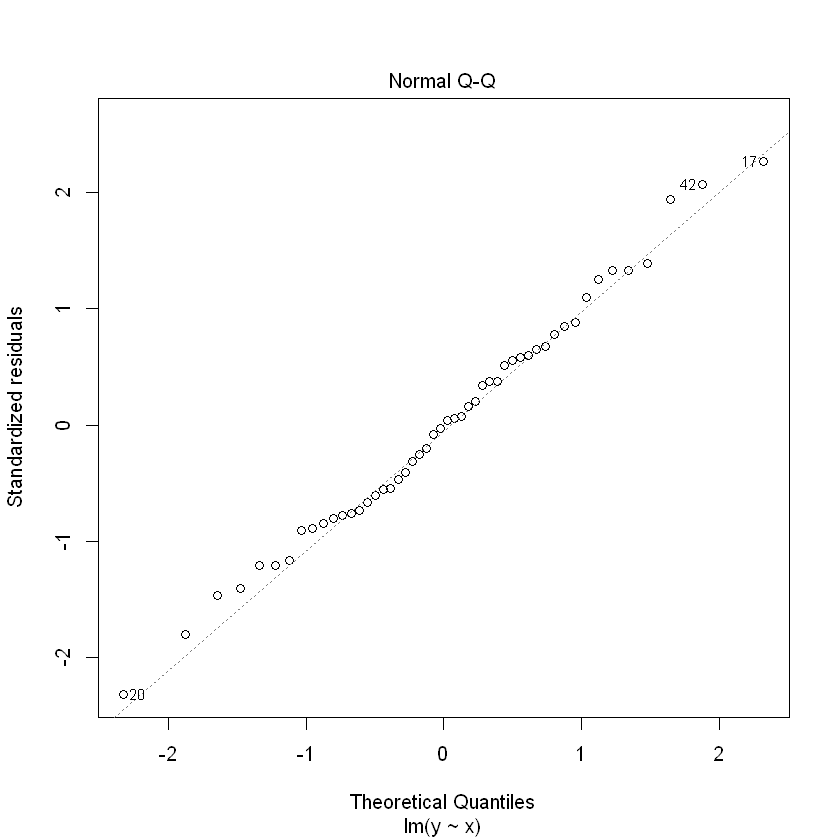

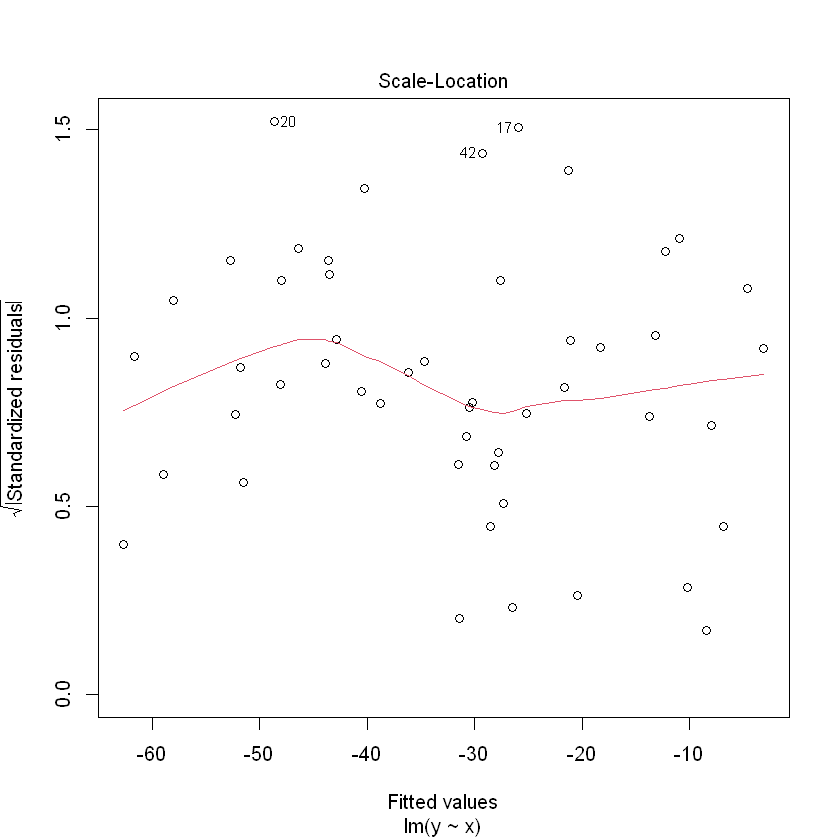

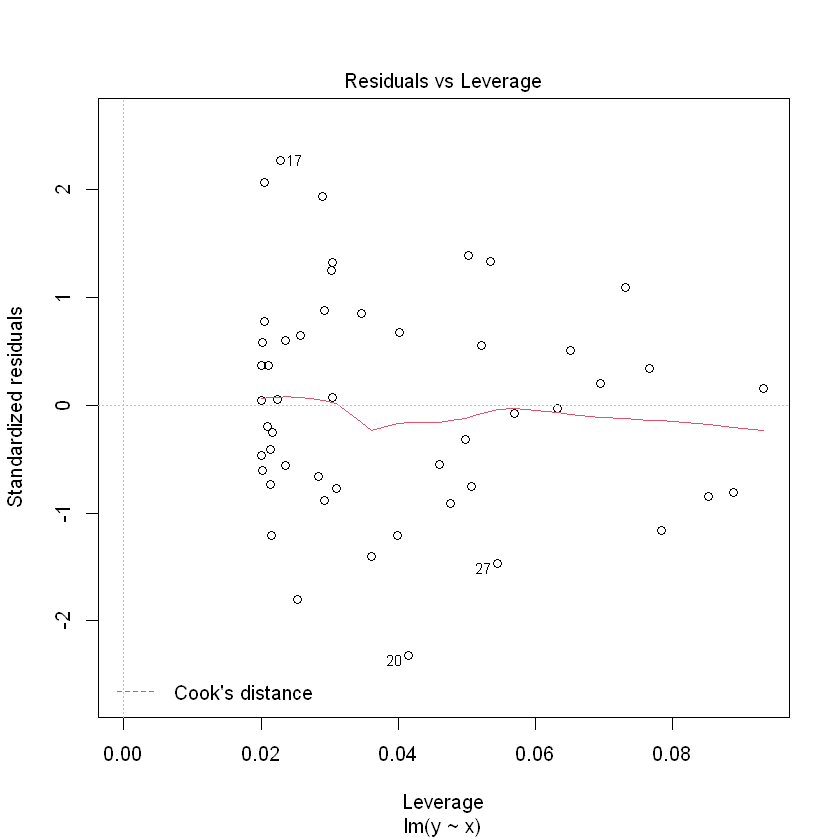

In [36]:
plot(L)

### check if the noise is Gaussian
the graph QQPlot enable this
The points should be very close to the dotted line so that theorical and empirical quartile are equivalent
The extreme points may be farer to the dotted line

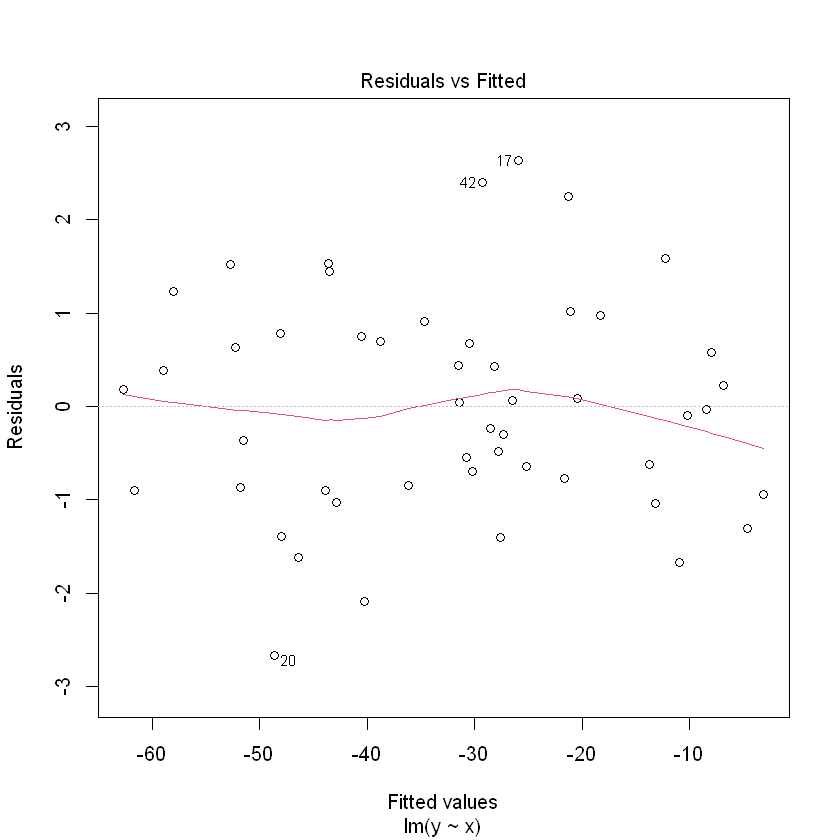

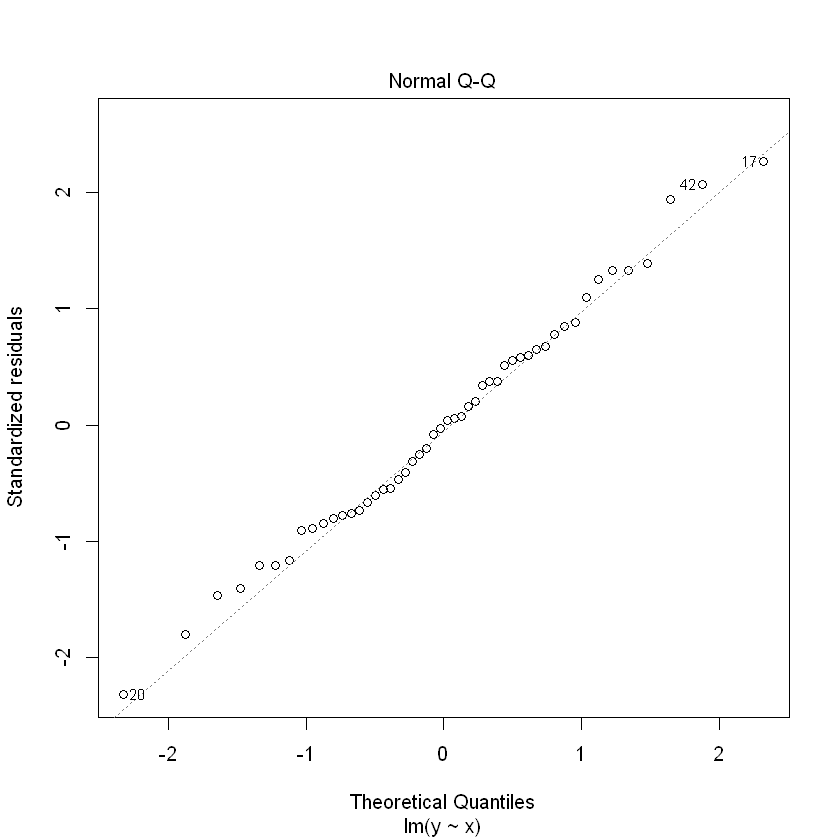

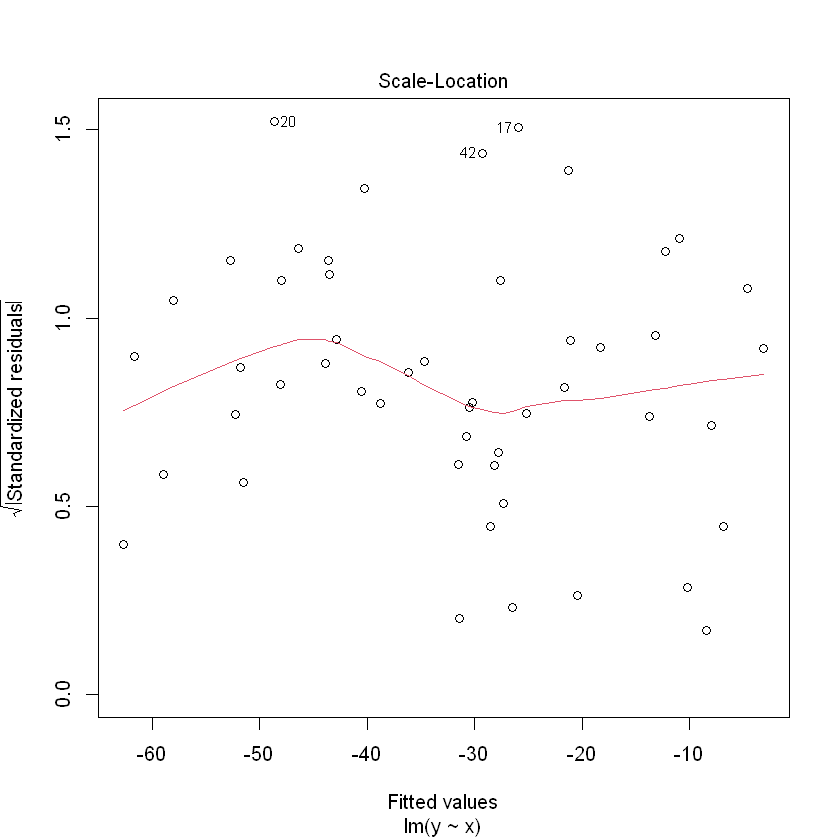

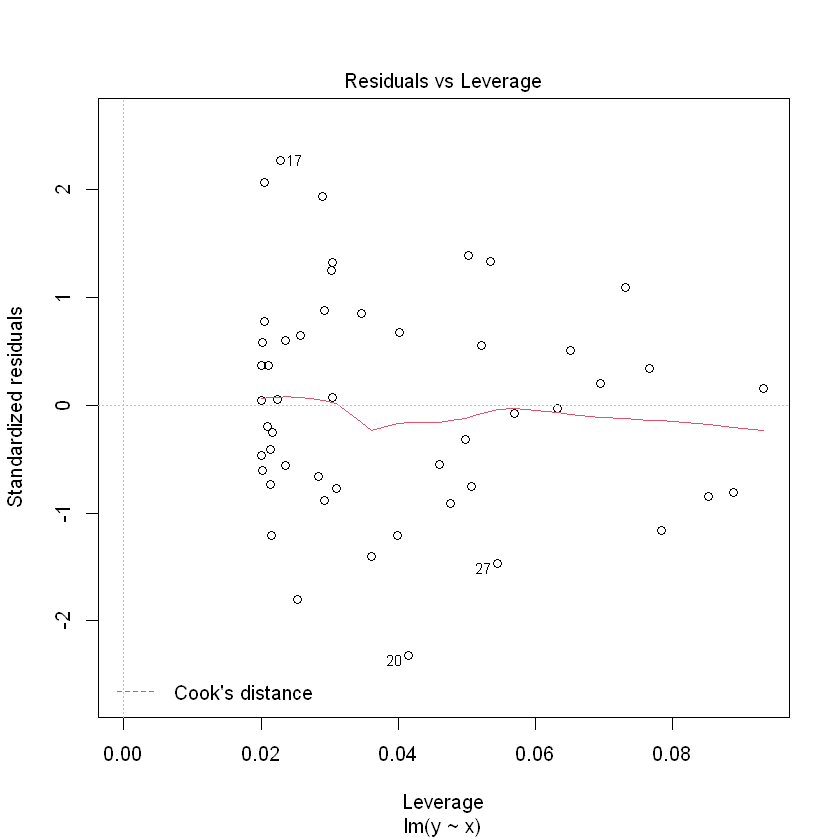

In [35]:
plot(L)

Even if it is not always very simple to be sure of the fact that the noise is Gaussian with the graphic
in the following plotting we have added a noise with an exponential distribution and the dots are quit close to the dotted line.

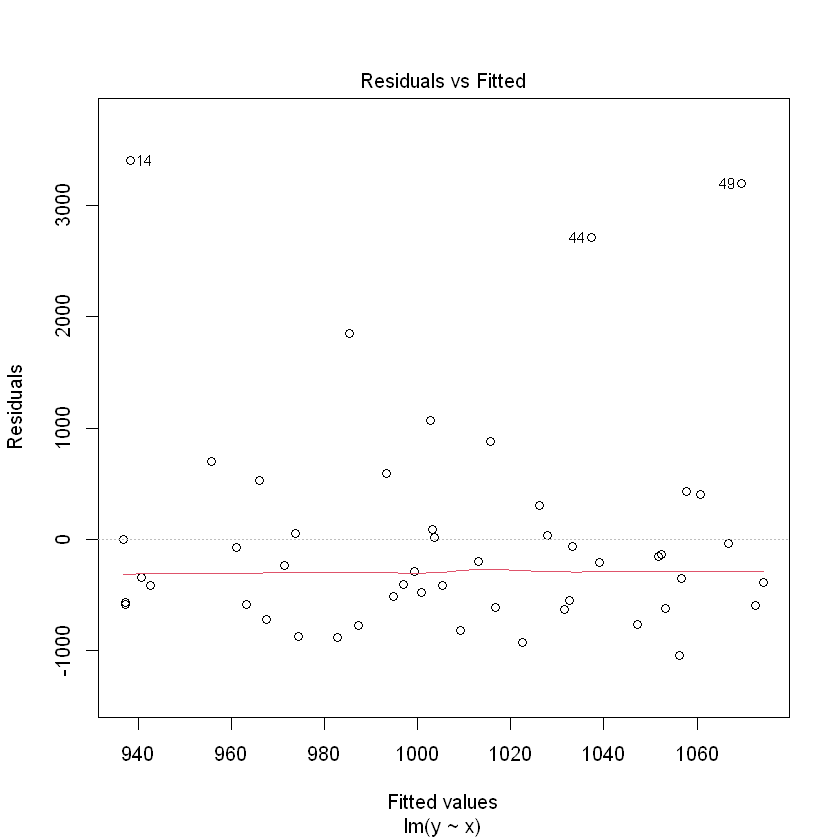

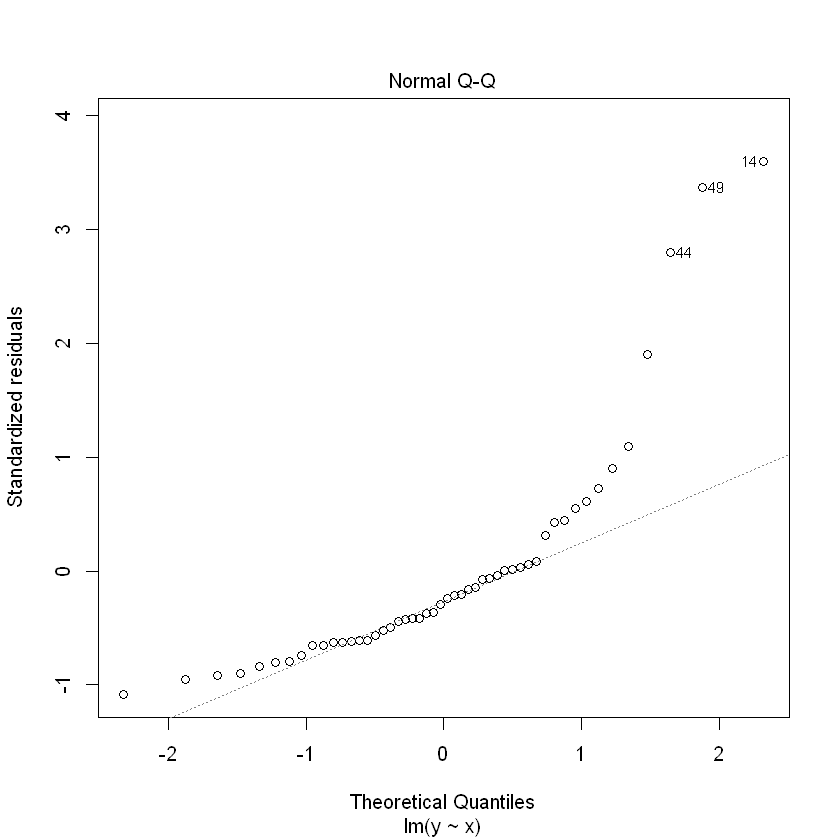

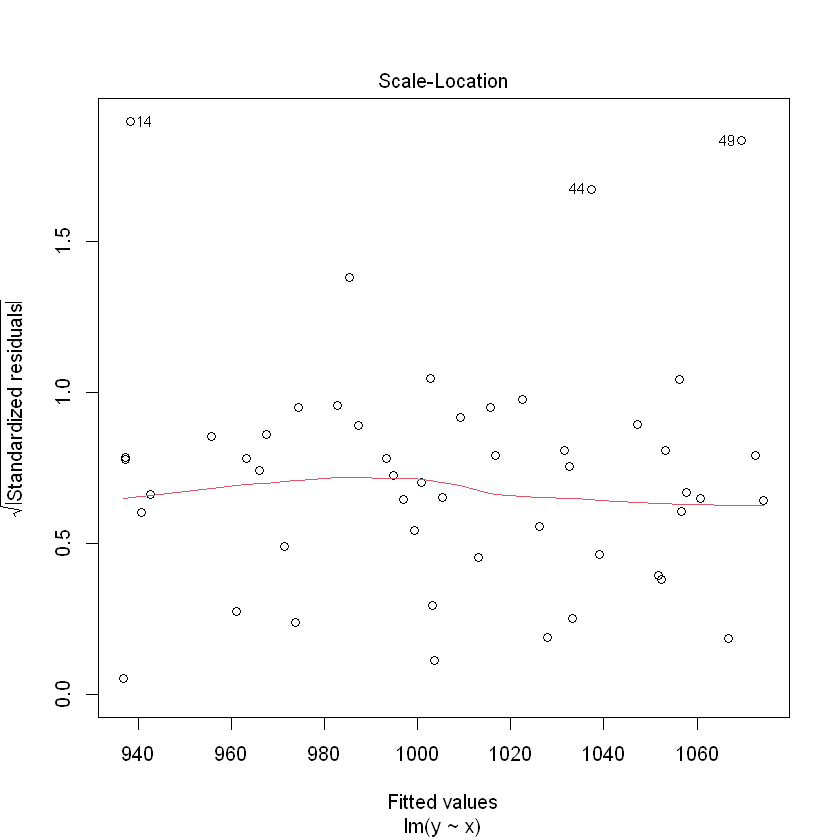

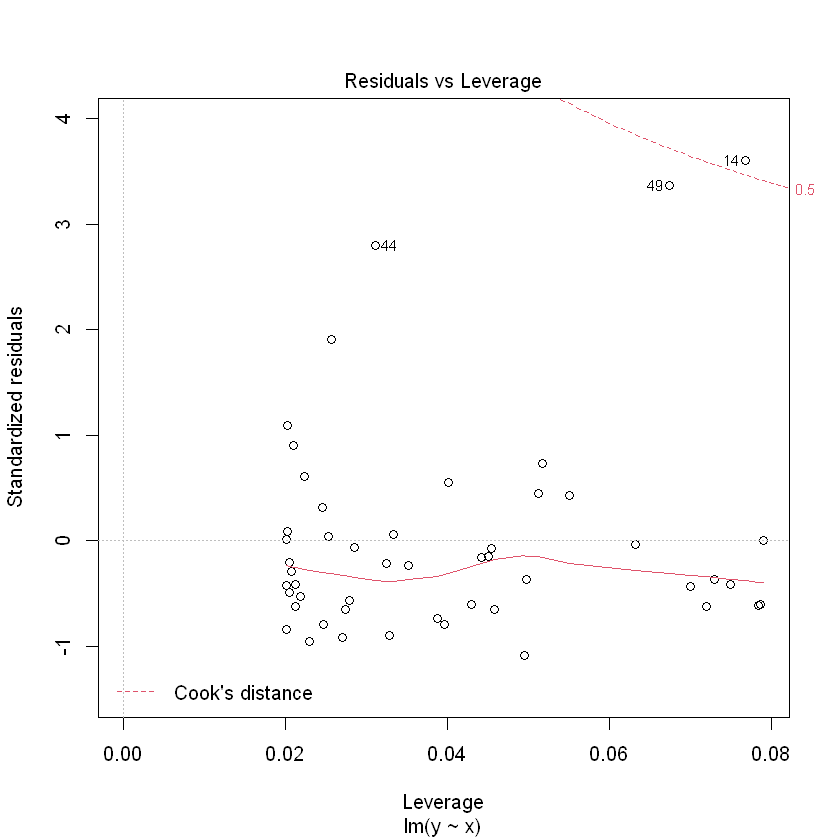

In [73]:
# exemple with an exponentiel noise => not easy with the graphic !
y=1+2*x+rexp(50,0.001)
L=lm(y~x)
plot(L)

Another way to controle this is to look at the summary of the "linear regression" object and to check if min / max or 1Q / 3Q are symetric. In the exemple below, it is clearly not the case. Also possible with boxplot function that mus be centered

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.64804 -0.25881  0.03661  0.00000  0.30559  1.24120 

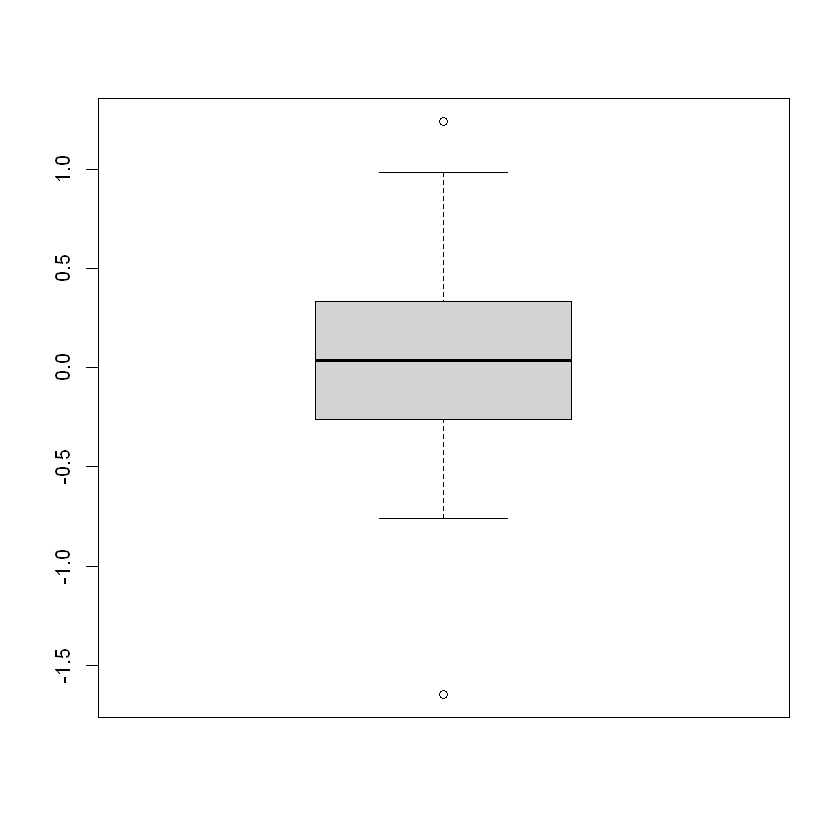

In [101]:
summary(L$residuals)
boxplot(L$residuals)

Finally, a more accurate possibility is to build the histogram of the residuals and to comapre it with the gaussian N(0,(sigma estimator)^2)

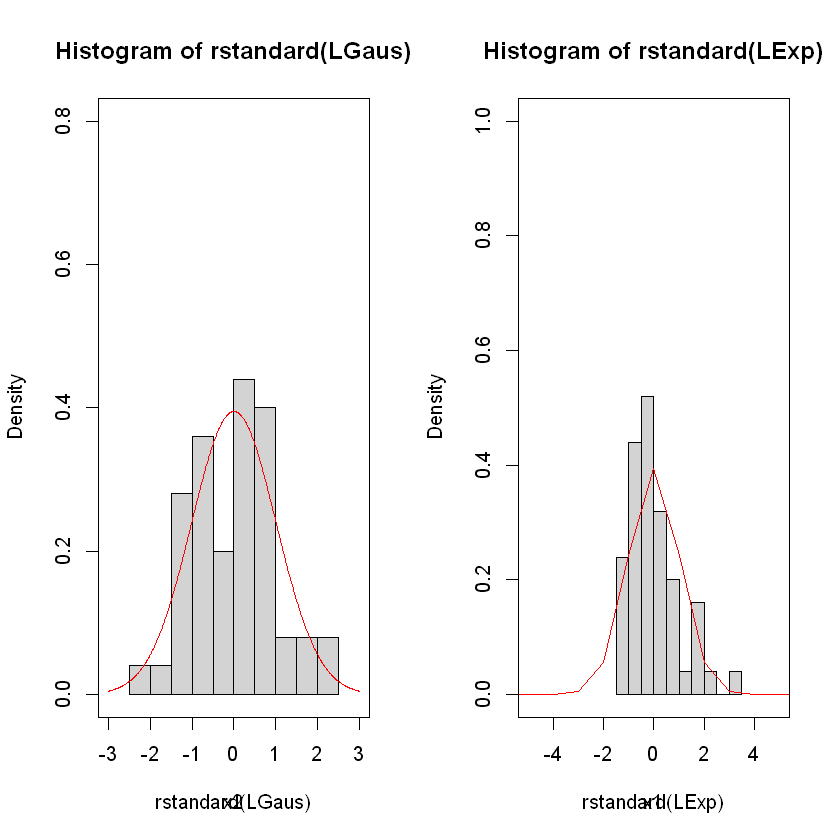

In [243]:
yExp=1+2*x+rexp(50,0.001)
yGaus=1+2*x+rnorm(50,0,1)
LExp=lm(yExp~x)
LGaus=lm(yGaus~x)
#hist(LExp$residuals, freq=FALSE)
par(mfrow=c(1,2))
hist(rstandard(LGaus),breaks=15,xlim=c(-3,3),ylim=c(0,0.8),freq= FALSE) 
x2=seq(-3,3,0.01)
var=var(rstandard(LGaus))
par(new=TRUE)
plot(x2,dnorm(x2,0,sqrt(var)),type='l',col='red',xlim=c(-3,3),ylim=c(0,0.8),ylab="") 
hist(rstandard(LExp),breaks=15,xlim=c(-5,5),ylim=c(0,1),freq= FALSE) 
x1=seq(-5000,5000,1)
var=var(rstandard(LExp))
par(new=TRUE)
plot(x1,dnorm(x1,0,sqrt(var)),type='l',col='red',xlim=c(-5,5),ylim=c(0,1),ylab="") 


In [236]:
rstandard(LExp)

1           2           3           4           5           6 
-0.72520766 -0.63353147  1.70554964 -0.63182097 -1.46536747 -0.19412909 
          7           8           9          10          11          12 
 0.46842416  1.02328778  0.41570611 -1.13999243 -0.93000331 -1.37086345 
         13          14          15          16          17          18 
 0.25264041 -0.58187056  2.71720169  0.14009426 -0.84789709 -1.38541510 
         19          20          21          22          23          24 
-0.79048405  0.73464026  0.24254215  1.72948262 -0.58449181  1.57040576 
         25          26          27          28          29          30 
-0.69171176 -0.43284418  0.11843503 -0.93643055 -0.03228352 -0.56563329 
         31          32          33          34          35          36 
-1.20054473  0.44501775 -0.58735617  0.33728815 -0.90572500  1.86751069 
         37          38          39          40          41          42 
-0.01266342 -0.49685148  1.96889795 -0.63852717  0.10504948 -0.05408239 
         43          44          45          46          47          48 
 0.50300230 -0.29206149  0.99395217 -0.45228390 -0.19412509 -0.25933909 
         49          50 
-0.65977391  2.38786940

## studentize residuals

R propose functions to calculare standardized and studentized residuals

In [97]:
x=runif(50,14,50)
y=1+2*x+rnorm(50,0,0.5)
L=lm(y~x)
resstand=rstandard(L)
resstud=rstudent(L)

On the graph "Residual vs fitted" the points with a number are those for which the abs(studentized residual) > 2, even if this graph is done with the "classical" residual.
Those points are outliers for the regression

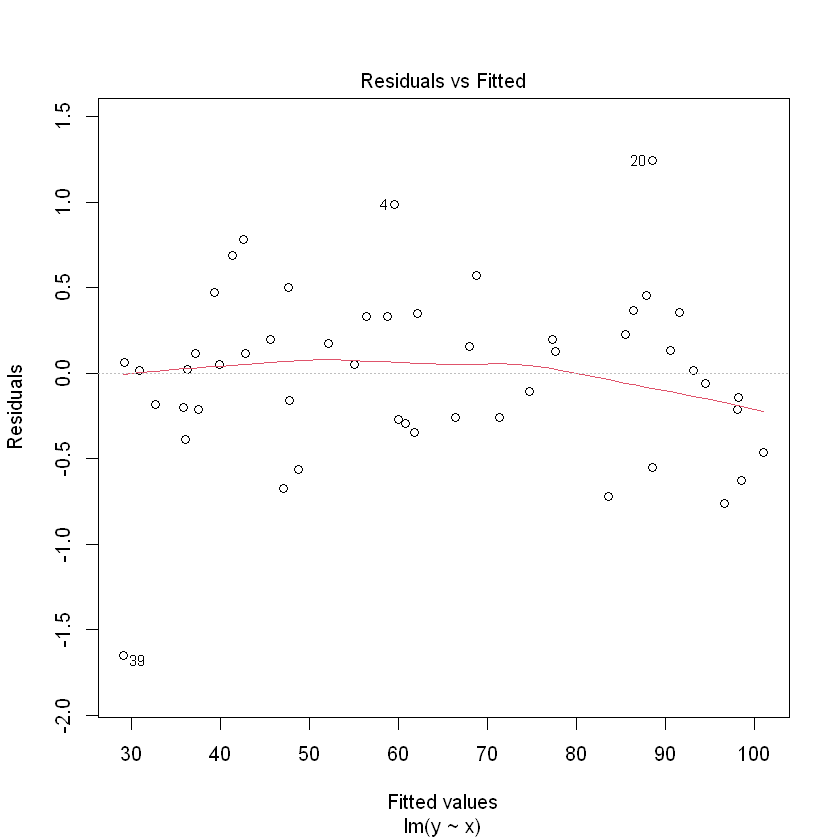

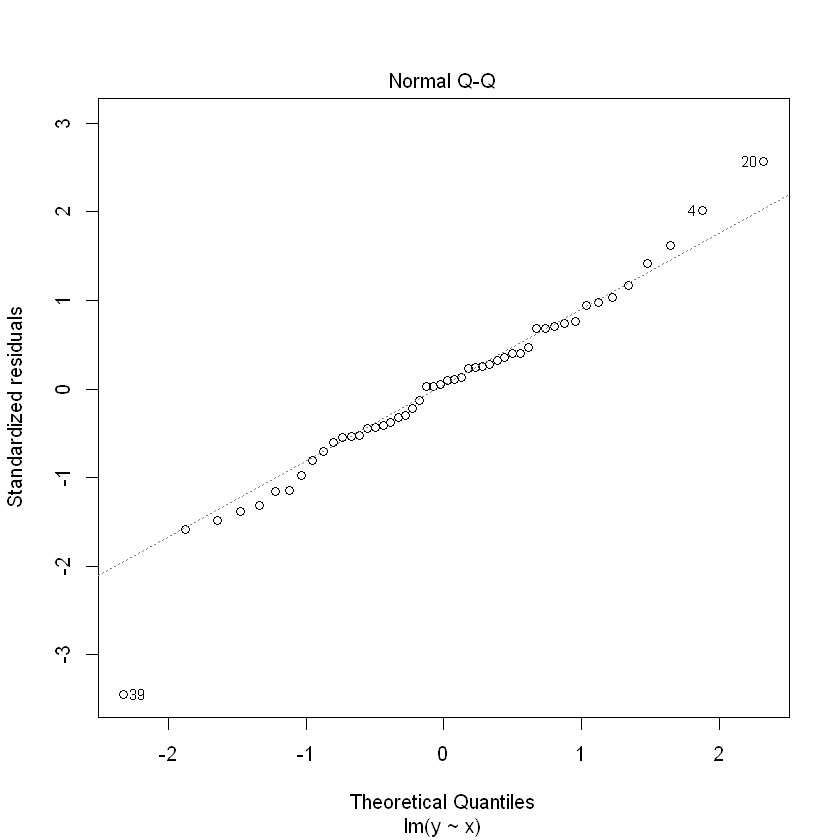

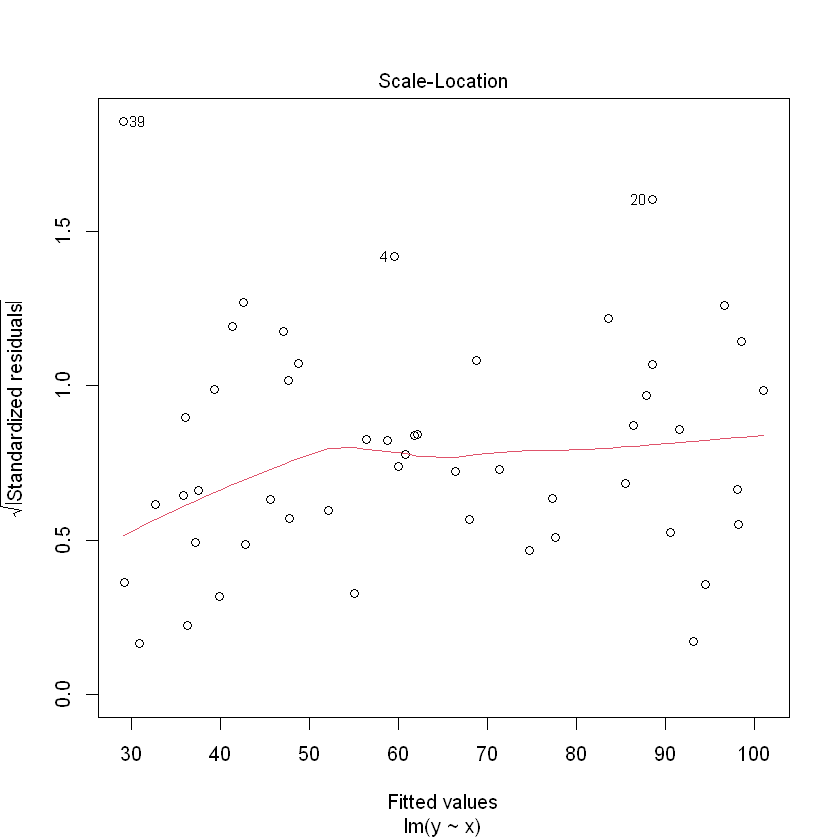

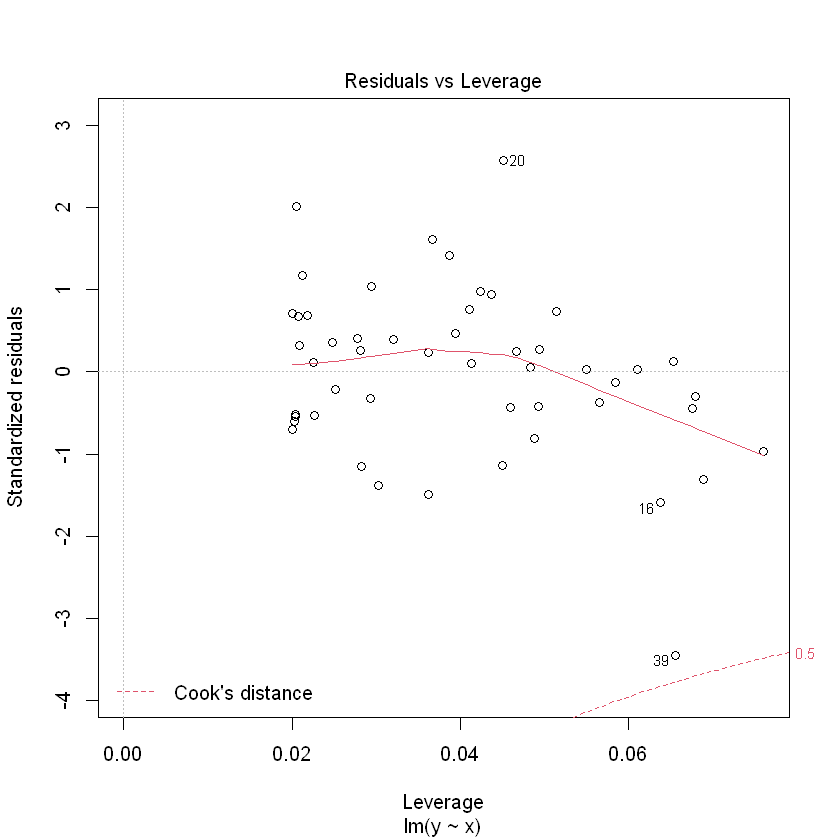

In [98]:
plot(L)

In [99]:
resstud

1           2           3           4           5           6 
 0.39676001  0.09959428  0.23449618  2.07745484 -0.43476253 -0.52695215 
          7           8           9          10          11          12 
 0.75371611 -0.12539538 -0.37487262  0.35285965  0.67735037  0.67388620 
         13          14          15          16          17          18 
-1.15692857  1.43507407 -0.43759538 -1.61429022 -0.52005840  0.02951475 
         19          20          21          22          23          24 
 0.25576687  2.73671657  0.23983273  0.10724372 -0.80515557  0.12946667 
         25          26          27          28          29          30 
 0.70602979 -0.54376895 -0.21518242 -1.14415296  0.73542871  0.93607009 
         31          32          33          34          35          36 
 0.02759589  0.31712024 -0.97050034 -0.41188989  0.97568930  1.03447524 
         37          38          39          40          41          42 
-0.70126382  0.05023225 -3.93299607  0.46528579 -1.39390216  1.17674911 
         43          44          45          46          47          48 
-0.59944399  1.64176813  0.39873694 -1.32097314 -1.50598620 -0.29928064 
         49          50 
-0.32130469  0.27448267

### if the asumptions are not validated for the noise, in the summary(L) list of properties, the only one that can be used are :
* a and b values
* Residual standard error
* Multiple R-squared

In [131]:
summary(L)


Call:
lm(formula = A$maxO3 ~ A$T12)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.079 -12.735   0.257  11.003  44.671 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -27.4196     9.0335  -3.035    0.003 ** 
A$T12         5.4687     0.4125  13.258   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.57 on 110 degrees of freedom
Multiple R-squared:  0.6151,	Adjusted R-squared:  0.6116 
F-statistic: 175.8 on 1 and 110 DF,  p-value: < 2.2e-16


## Confident Interval
### get a confident interval with R
But, R will give an answer even if the assumption related to the noise are not verified

In [105]:
#confident interval
confint(L,level=0.95)

,2.5 %,97.5 %
(Intercept),0.2750682,1.102436
x,1.9978722,2.022890


### How to plot the two "confident interval curves" related to a new prediction Yn+1
use predict fonction with parameter interval = 'confidence" for CI on E(Yn+1) - blue dash line
use predict fonction with parameter interval = 'prediction" for CI on Yn+1 - green dash line

Remarks :
* some point may be outside since some points can be outside (alpha = 95%)
* for prediction it is the green CI that is important

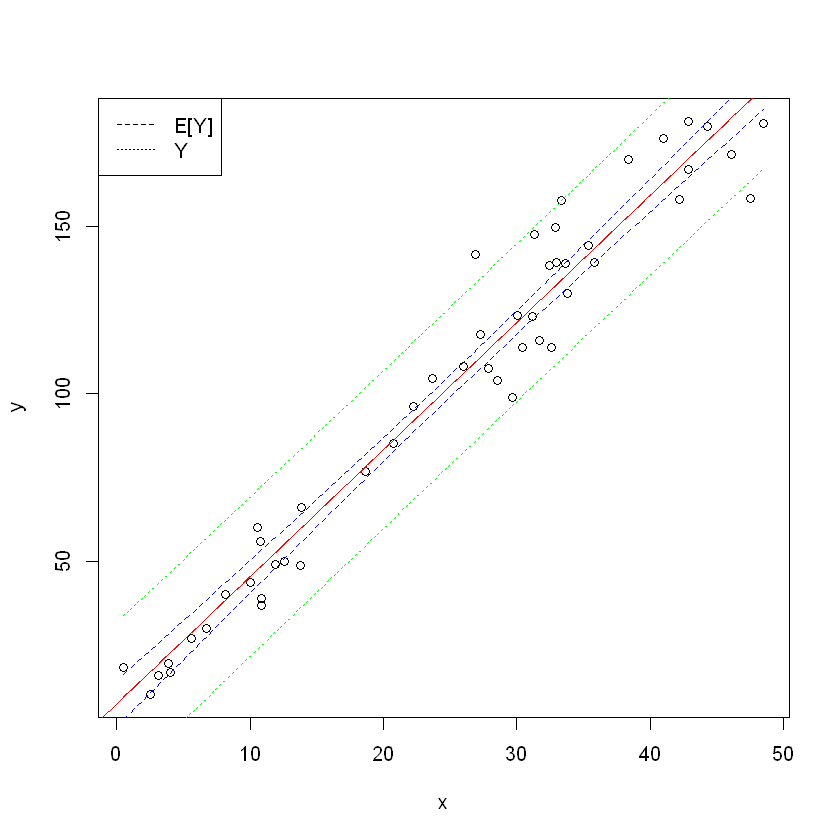

In [116]:
# 
x=runif(50,0,50)
y=2+4*x+rnorm(50,0,10)
plot(x,y)
L=lm(y~x)
abline(L,col='red')
# new observation must have the same name (as x)
x=seq(min(x),max(x),length=100)
# x must be a dataframe
CI1=predict(L,newdata=as.data.frame(x),interval='confidence',level=0.95)
CI2=predict(L,newdata=as.data.frame(x),interval='prediction',level=0.95)
#cbind add columns
# lty : types of lines - help(par)
matlines(x,cbind(CI1,CI2[,-1]),lty=c(1,2,2,3,3),col=c('red','blue','blue','green','green'))
legend("topleft",lty=2:3,c('E[Y]','Y'))


# Day 7
Possibility to compute a linear model, even if the data seems not very linear

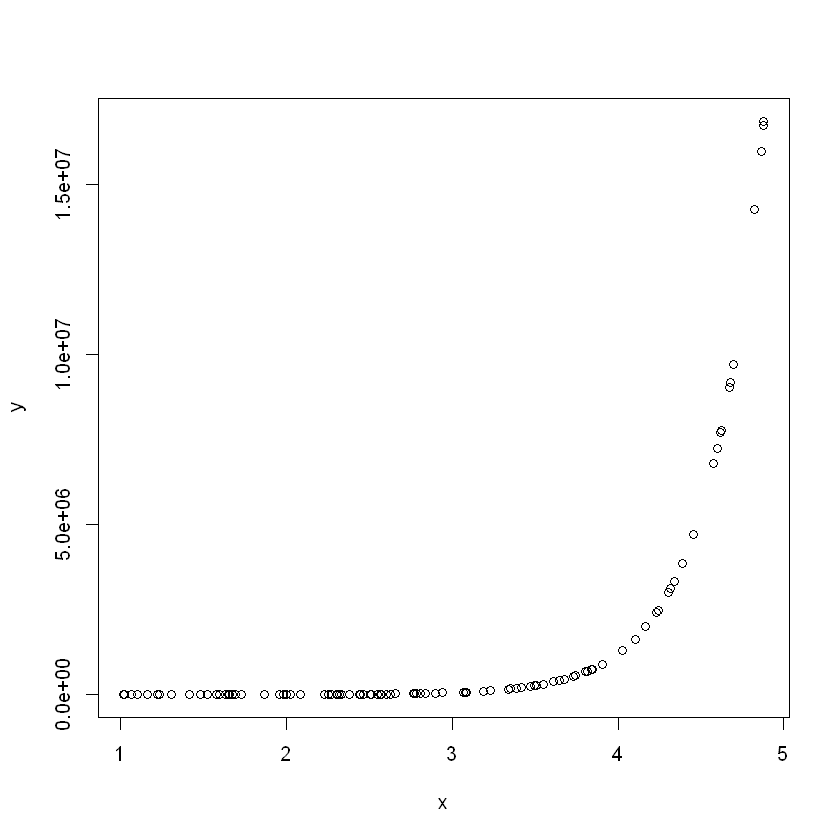

In [168]:
x=runif(100,1,5)
y=exp(2+3*x)+rnorm(100,0,1)
plot(x,y)

In [169]:
L=lm(y~x)
summary(L)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2843369 -1990096  -563798  1297697 11001220 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4768057     781034  -6.105 2.07e-08 ***
x            2175903     249323   8.727 6.96e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2773000 on 98 degrees of freedom
Multiple R-squared:  0.4373,	Adjusted R-squared:  0.4316 
F-statistic: 76.16 on 1 and 98 DF,  p-value: 6.957e-14


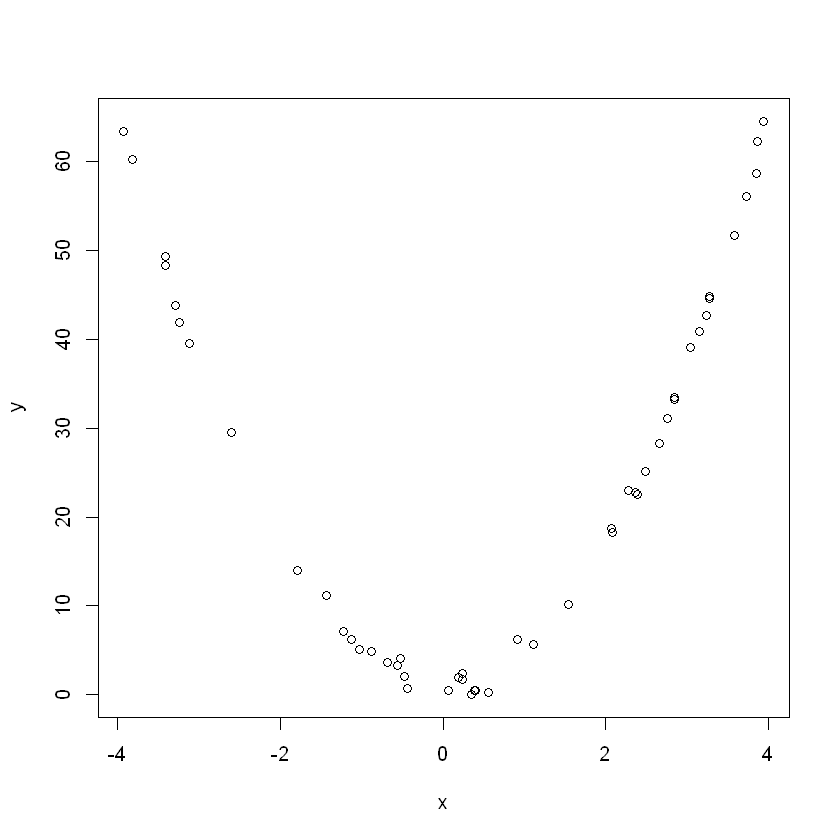

In [170]:
x=runif(50,-4,4)
y=1+4*x^2+rnorm(50,0,1)
plot(x,y)

In [171]:
L=lm(y~x)
summary(L)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.386 -19.068  -4.539  16.267  45.348 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   23.765      3.088   7.695 6.39e-10 ***
x              1.450      1.275   1.137    0.261    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 21.22 on 48 degrees of freedom
Multiple R-squared:  0.02624,	Adjusted R-squared:  0.005949 
F-statistic: 1.293 on 1 and 48 DF,  p-value: 0.2611


By transforming the datas it is possible to go back to a linear model

In [172]:
T=x^2
L1=lm(y~T)
summary(L1)


Call:
lm(formula = y ~ T)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09994 -0.68648 -0.03094  0.79375  1.93852 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.03691    0.21694    4.78  1.7e-05 ***
T            4.01483    0.02757  145.61  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.022 on 48 degrees of freedom
Multiple R-squared:  0.9977,	Adjusted R-squared:  0.9977 
F-statistic: 2.12e+04 on 1 and 48 DF,  p-value: < 2.2e-16


### Get Rsquare without running lm

In [173]:
cor(x,y)^2

[1] 0.02623621

In [175]:
cor(T,y)^2

[1] 0.9977412

## Analysis of the file reg1.txt

In [254]:
reg1=read.table('reg1.txt',header=FALSE,dec='.')
colnames(reg1)=c('X','Y')
head(reg1)
dim(reg1)

,X,Y
,<dbl>,<dbl>
1,19.48785,1.5203410
2,18.08384,-0.4061314
3,13.80163,2.1274110
4,12.82095,1.6700520
5,17.78741,1.8717180
6,17.61689,0.1721909


[1] 100   2

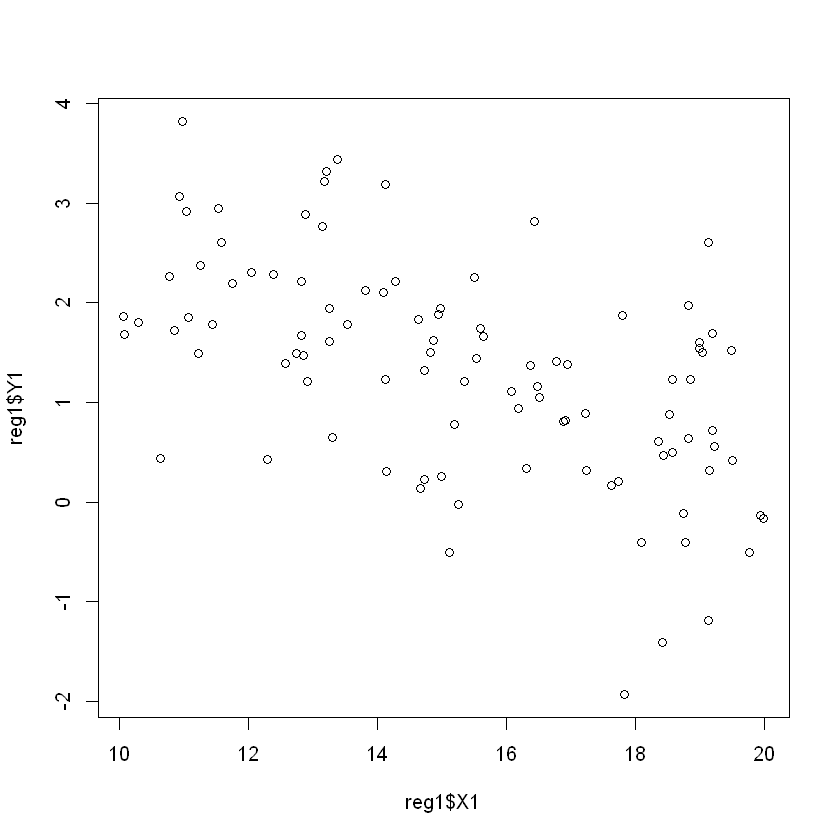

In [207]:
plot(reg1$X,reg1$Y)

In [255]:
L1=lm(Y~X,data=reg1)

In [256]:
summary(L1)


Call:
lm(formula = Y ~ X, data = reg1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.72420 -0.54717 -0.00295  0.52021  2.08067 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.50764    0.48958   9.207 6.36e-15 ***
X           -0.20846    0.03145  -6.628 1.86e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9052 on 98 degrees of freedom
Multiple R-squared:  0.3095,	Adjusted R-squared:  0.3025 
F-statistic: 43.93 on 1 and 98 DF,  p-value: 1.856e-09


R-Squared is low so we are not sure that a linear regression can be done
You can always use a,b due to list square criterion. 
b = -0.20846 which is closed to 0 : we have to check that b <> 0

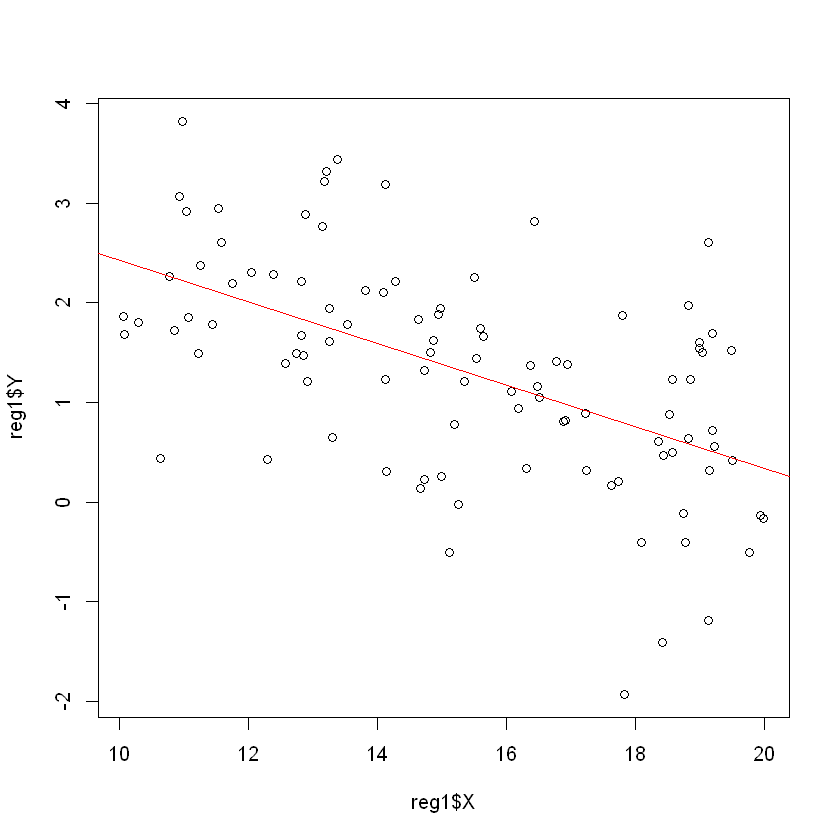

In [259]:
plot(reg1$X,reg1$Y)
abline(L1,col='red')


To check if b could be = 0, we have to calculate its confident interval. 
For this we need to see if asumptions on the noise are satisfied

Symetry of Residuals : min/max, mean, Q1/Q3 are not bad

More in detail : 
* centered : yes, but points 91 and 88 seems far for the mean
* homosudasticity : no dispersion (increasing / decreasing in the "Rsiduals vs Fitted" graph
* Gaussian : Q-Q plot is ok, except for the extermes (but this is often the case)


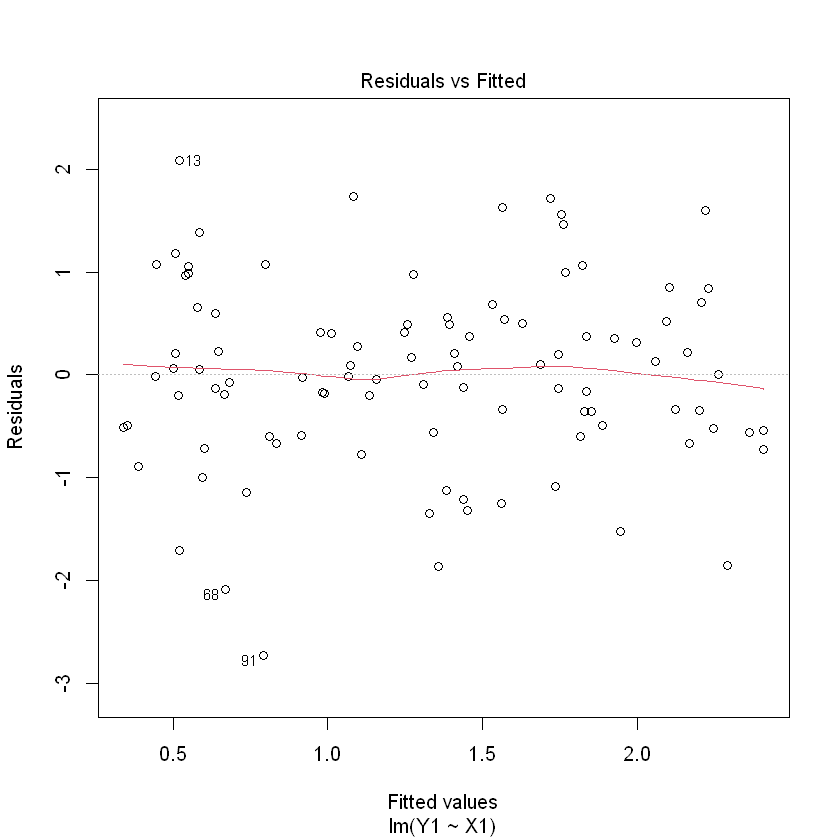

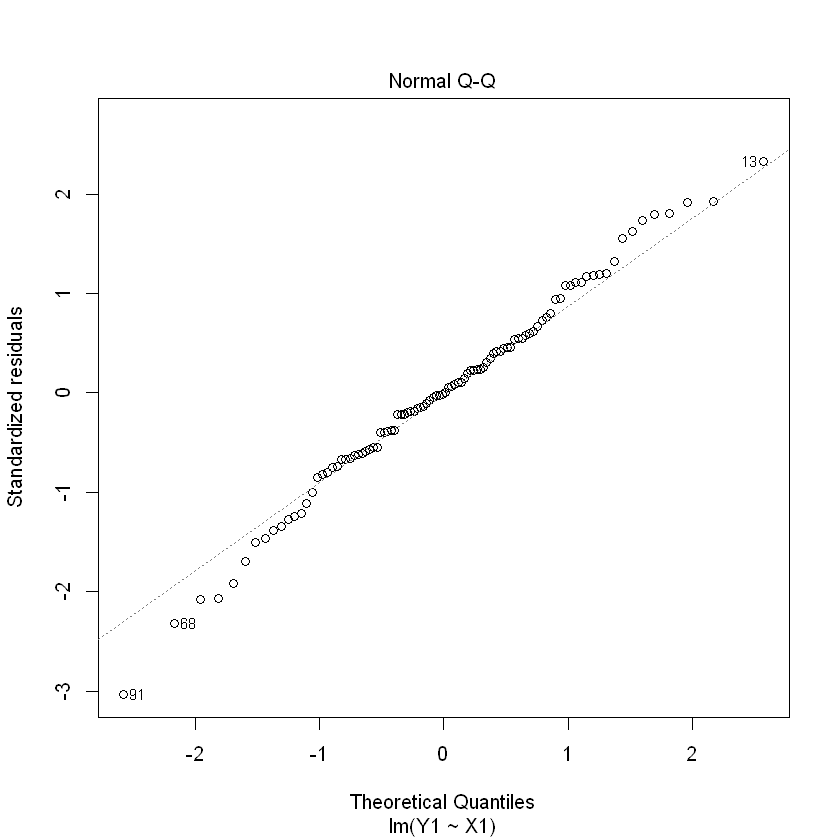

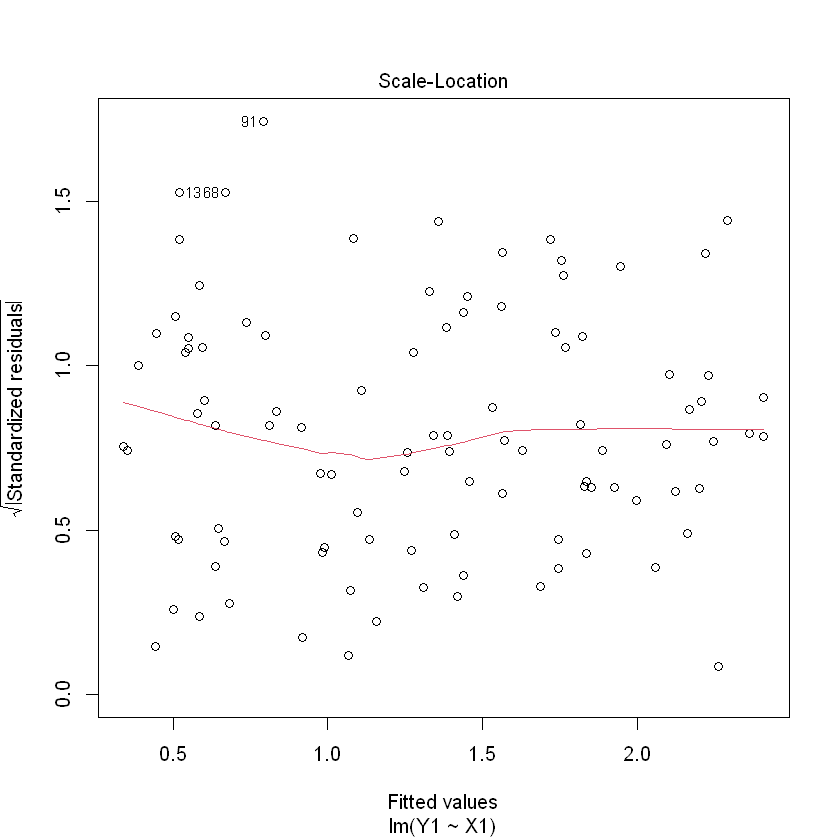

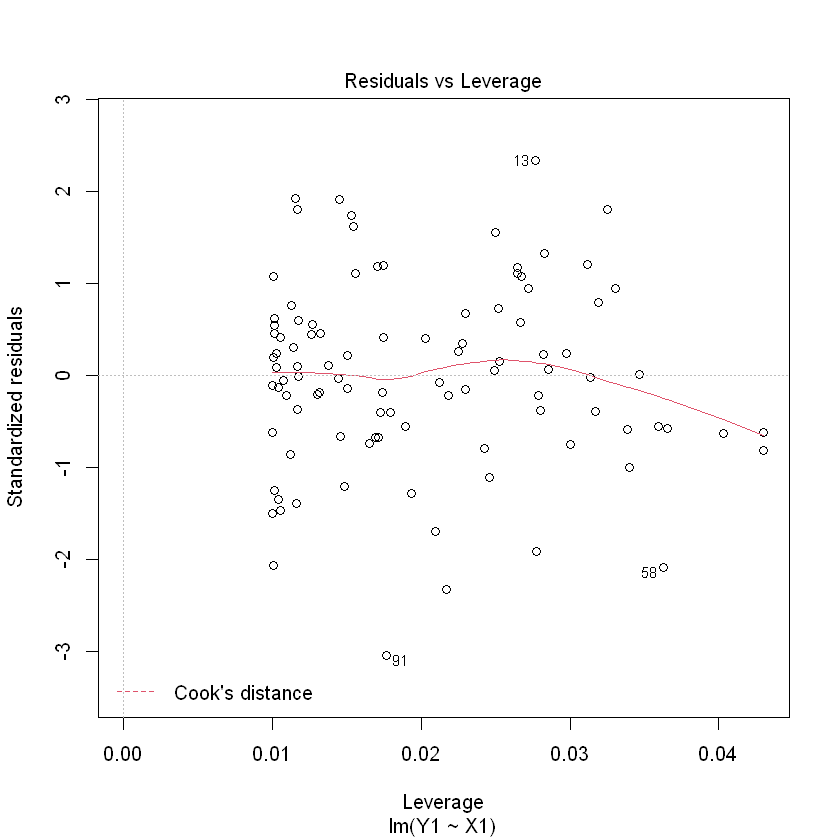

In [211]:
plot(L1)

histogramme : be carefull : use standardized residuals
    the histogram is ok

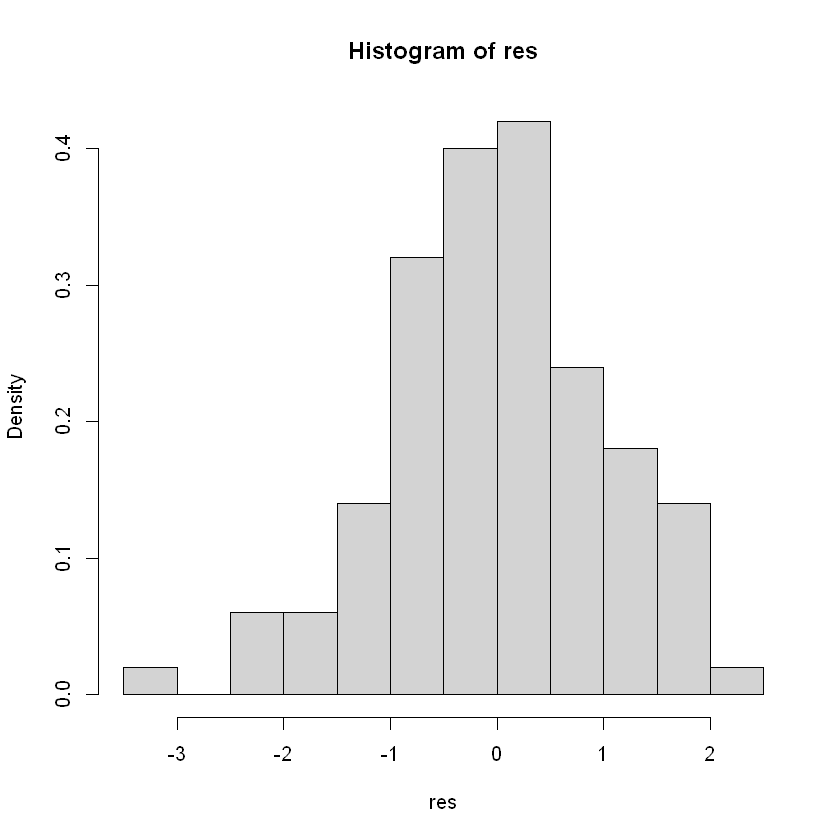

In [213]:
res=rstandard(L1)
hist(res, freq = FALSE)

We find 5 outliers either using the vector 

In [215]:
res2=rstudent(L1)

In [219]:
res2[abs(res2) > 2]

13        38        58        68        91 
 2.386190 -2.099916 -2.117352 -2.379725 -3.173881

or plot adding -2 and 2 lines

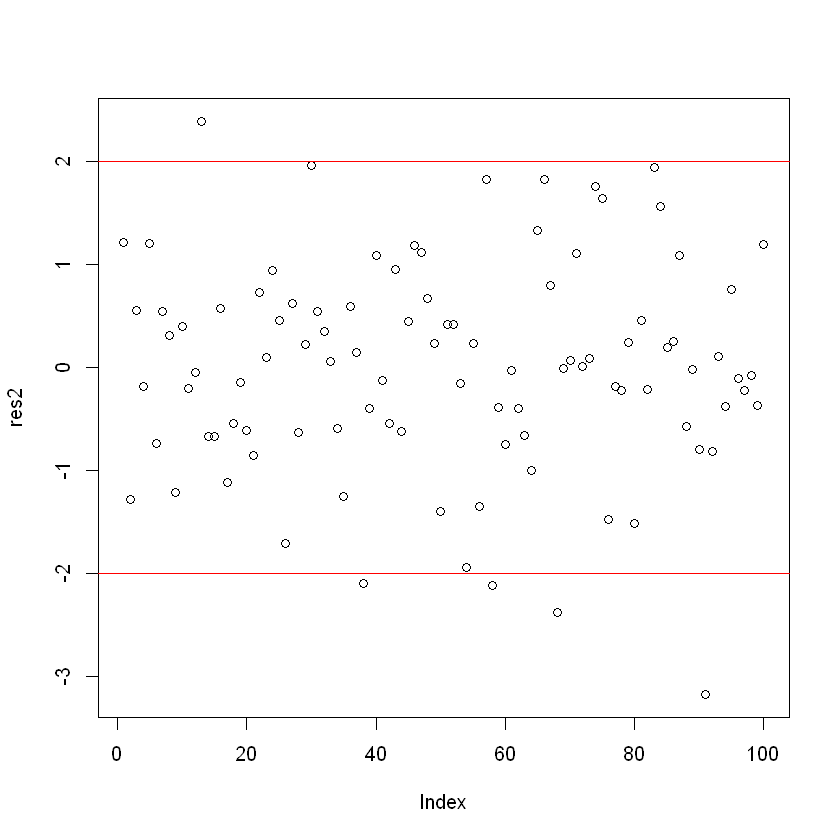

In [221]:
plot(res2)
abline(h=2,col='red')
abline(h=-2,col='red')

The steps to follow regarding outliers are :
* perform the regression without the outliers : if there is an impact, ask the experts of the dataset to see if it is possible to really suppress them or if they are normal and should be kept.

The asumption regarding the nois are ok and it is Gaussian => we can compute classical confident interval

In [222]:
confint(L1,level=0.95)

,2.5 %,97.5 %
(Intercept),3.5360876,5.4791912
X1,-0.2708783,-0.1460508


0 is not in the CI for b parameter. So we can say that with probability 0.95 the slope is different from 0.
So there is a linear link between x and y with a probability of 95%

Plot the CI for Yn+1 and E(Yn+1)

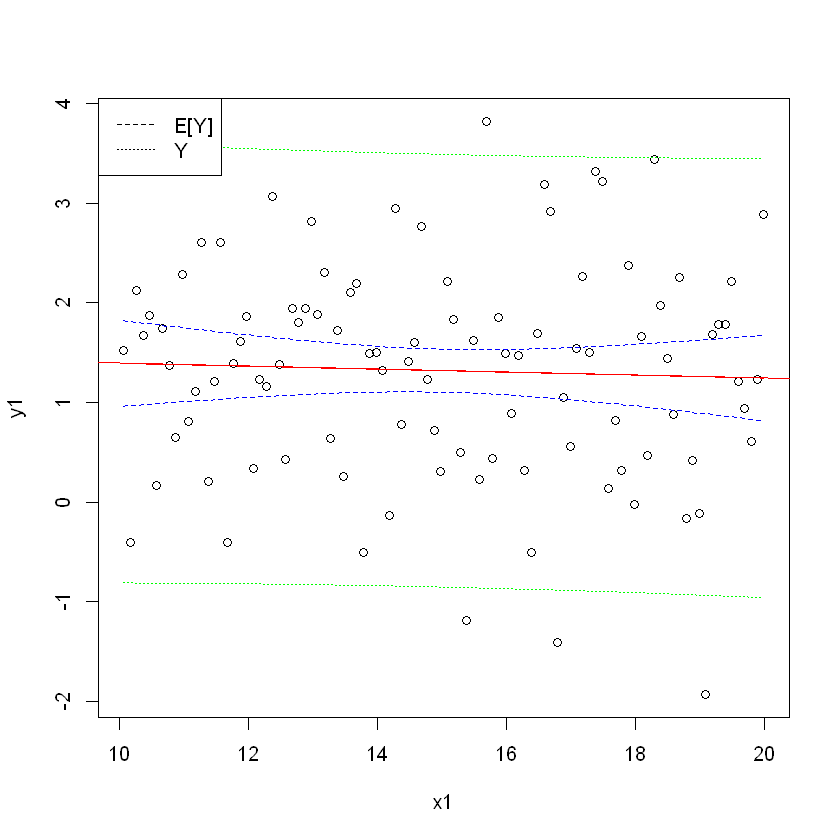

In [232]:
L1=lm(y1~x1)
plot(x1,y1)
abline(L1,col='red')
x1=seq(min(x1),max(x1),length=100)
# x must be a dataframe
CI1=predict(L1,newdata=as.data.frame(x1),interval='confidence',level=0.95)
CI2=predict(L1,newdata=as.data.frame(x1),interval='prediction',level=0.95)
#cbind add columns
# lty : types of lines - help(par)
matlines(x1,cbind(CI1,CI2[,-1]),lty=c(1,2,2,3,3),col=c('red','blue','blue','green','green'))
legend("topleft",lty=2:3,c('E[Y]','Y'))

## Analysis of the file reg2.txt

In [244]:
reg2=read.table('reg2.txt',header=FALSE,dec='.')
colnames(reg2)=c('X','Y')
head(reg2)
dim(reg2)

,X,Y
,<dbl>,<dbl>
1,19.48785,8.052981
2,18.08384,10.523270
3,13.80163,8.941360
4,12.82095,8.309731
5,17.78741,10.663020
6,17.61689,10.913890


[1] 100   2

Same structure as Reg1 : 100 rows and 2 column renamed X and Y
Plot to have an idea of the dats$as

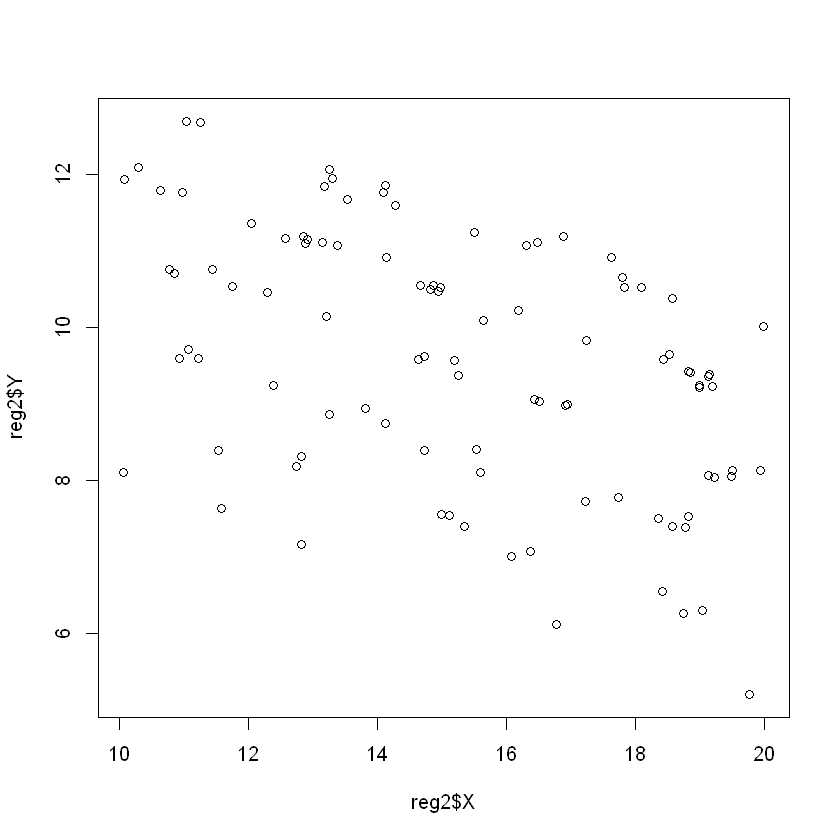

In [246]:
plot(reg2$X,reg2$Y)

We can imagine a line ...
Check RSquare and a,b coefficient

In [249]:
L2=lm(Y~X,data=reg2)
summary(L2)


Call:
lm(formula = Y ~ X, data = reg2)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.12482 -1.13654  0.08256  0.94724  2.07272 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.8404     0.7876  17.572  < 2e-16 ***
X            -0.2792     0.0506  -5.519 2.79e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.456 on 98 degrees of freedom
Multiple R-squared:  0.2371,	Adjusted R-squared:  0.2293 
F-statistic: 30.46 on 1 and 98 DF,  p-value: 2.788e-07


R-Squared is low : 0.2371 and b coeffcient is closed to 0 : -0.2792
Let's add the regression line to the plot


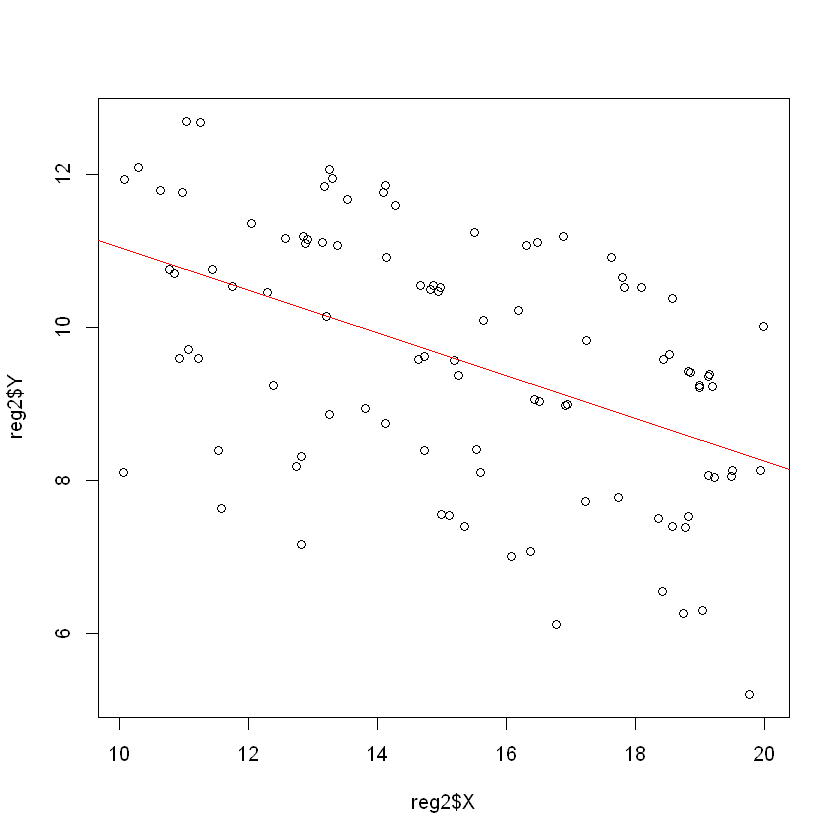

In [252]:
plot(reg2$X,reg2$Y)
abline(L2,col='red')

Before going further, let's have an idea about the noise by looking at the simetry of the residuals and at the different plottings of L2


Call:
lm(formula = Y ~ X, data = reg2)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.12482 -1.13654  0.08256  0.94724  2.07272 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.8404     0.7876  17.572  < 2e-16 ***
X            -0.2792     0.0506  -5.519 2.79e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.456 on 98 degrees of freedom
Multiple R-squared:  0.2371,	Adjusted R-squared:  0.2293 
F-statistic: 30.46 on 1 and 98 DF,  p-value: 2.788e-07


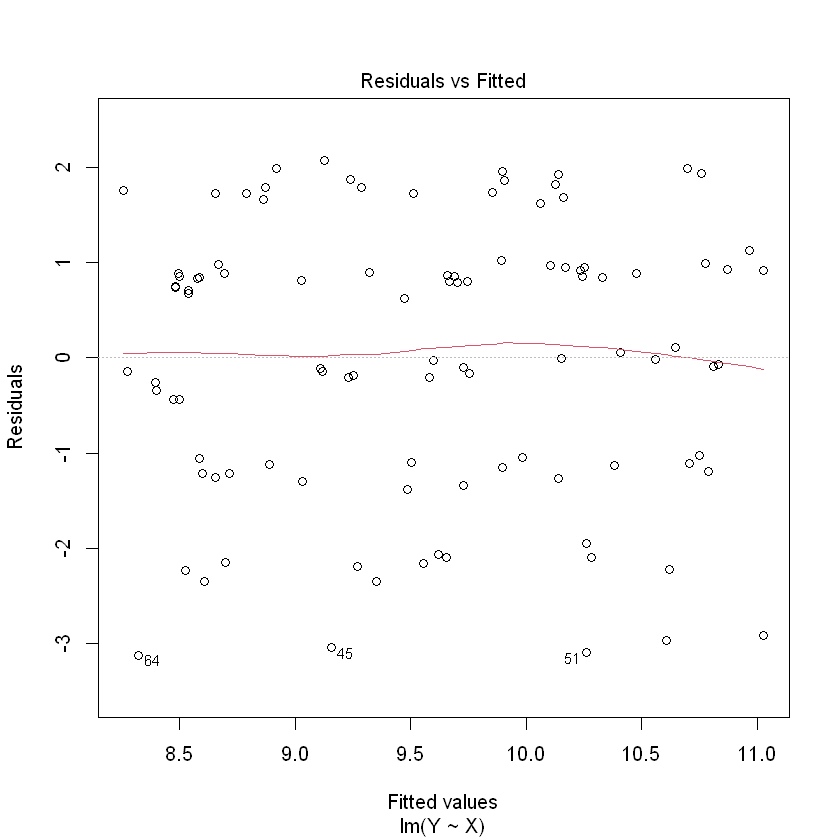

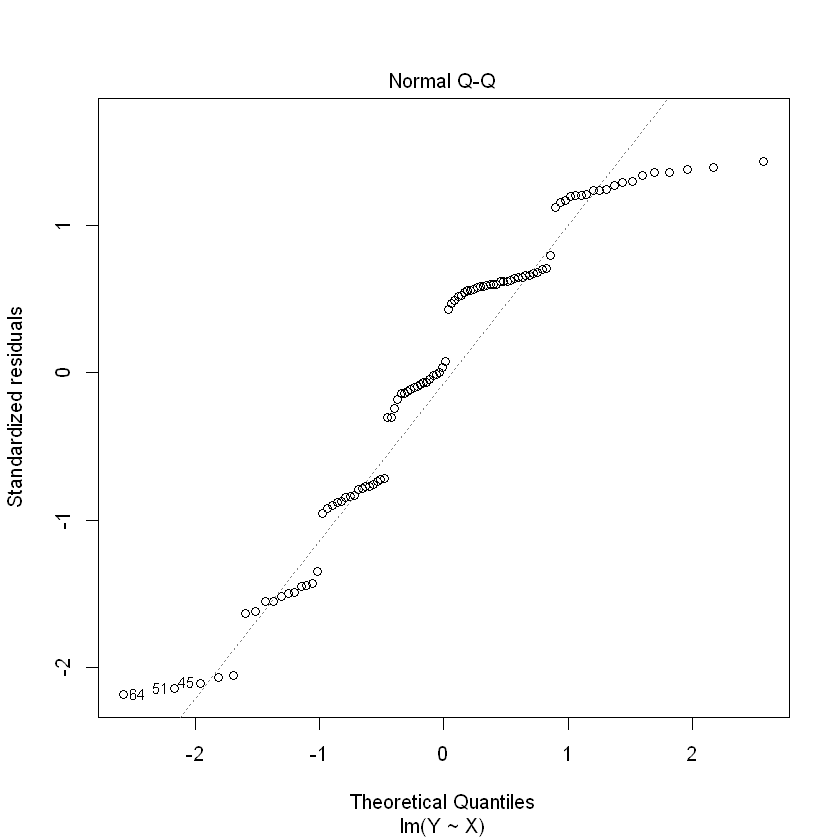

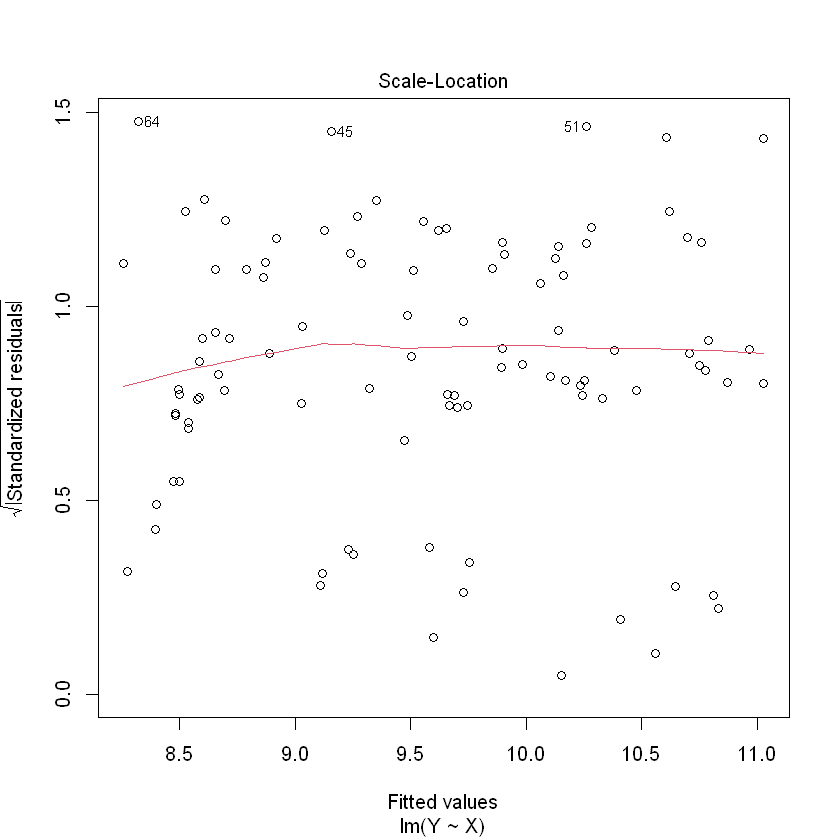

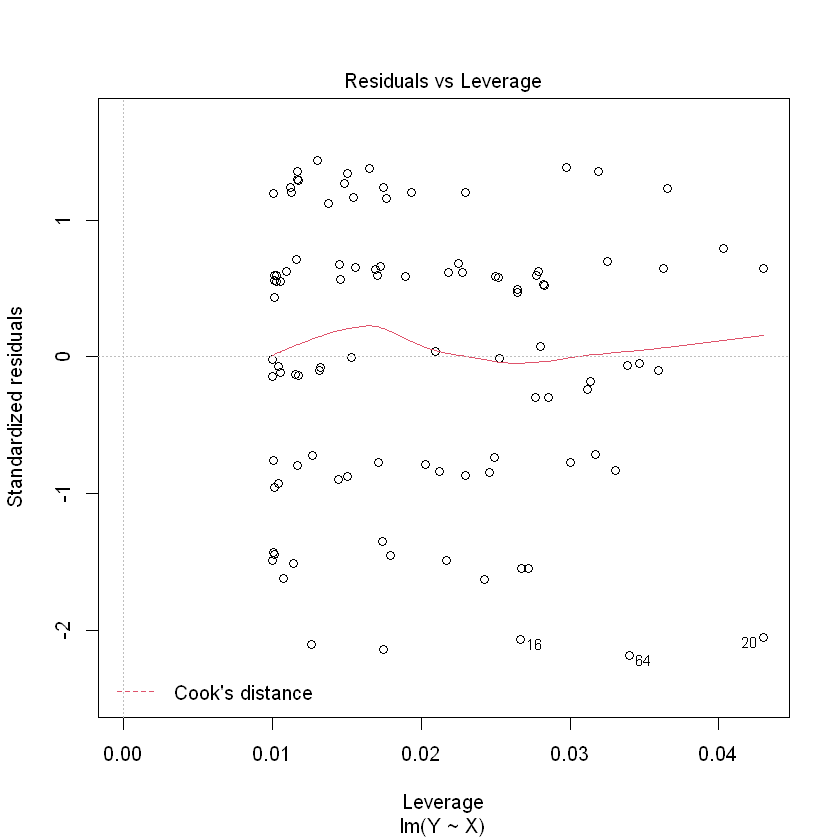

In [253]:
summary(L2)
plot(L2)

Looking at summary, the residuals do not seems really symetric (more under 0) : this is confirmed by the curve "Residual vs fitted". So the first asumption is wrong.
The gaussian hypothesis are also wrong (QQ plot not linear).
We stop the analysis at this point.